# EDA

Understand the data distribution and do some cleaning if needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', 0) # to wrap text in df

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
org_df = pd.read_csv('data/original_data/data.csv',sep=';')
train_df.shape, test_df.shape, org_df.shape

((76518, 38), (51012, 37), (4424, 37))

In [3]:
set(org_df.columns) - set(train_df.columns), set(train_df.columns) - set(org_df.columns)

({'Daytime/evening attendance\t'}, {'Daytime/evening attendance', 'id'})

Modify the `Daytime/evening attendance\t` column name in `org_df`

In [4]:
org_df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'},inplace=True)
org_df.shape, org_df.columns

((4424, 37),
 Index(['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        'Mother's qualification', 'Father's qualification',
        'Mother's occupation', 'Father's occupation', 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',

In [5]:
train_df = pd.concat([train_df.drop(columns=['id']), org_df], ignore_index=True).reset_index()
train_df.shape


(80942, 38)

First, we check out if there are any missing values

In [6]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

Phew! No missing data. That's a good thing.\
Let's rename a few columns for better readability

In [7]:
rename = {'index': 'id',
          'Marital status':'marital_status',
          'Application mode': 'appln_mode', # phase, general/special appln
          'Application order': 'appln_order', # 0-first choice to 9-last choice
          'Course': 'prog_of_study',
          'Daytime/evening attendance': 'morn/eve_attend', # binary
          'Previous qualification': 'prev_edu',
          'Previous qualification (grade)': 'prev_edu_grade', # grade in prev edu (between 0 and 200)
          'Nacionality': 'nationality',
          "Mother's qualification": 'mom_edu',
          "Father's qualification": 'dad_edu',
          "Mother's occupation": 'mom_occup',
          "Father's occupation": 'dad_occup',
          'Admission grade': 'admission_grade', # between 0 and 200
          'Displaced': 'was_displaced', # binary
          'Educational special needs': 'edu_spl_need', # binary
          'Debtor': 'has_student_debt', # binary
          'Tuition fees up to date': 'no_fee_dues', # binary
          'Gender': 'gender', # 1-male, 0-female
          'Scholarship holder': 'got_scholarship', # binary
          'International': 'is_international_student', # binary
          'Age at enrollment': 'age_at_start',
          'Curricular units 1st sem (credited)': 'sem1_units_credited',
          'Curricular units 1st sem (enrolled)': 'sem1_units_enrolled',
          'Curricular units 1st sem (approved)': 'sem1_units_approved',
          'Curricular units 1st sem (grade)': 'sem1_units_grade',
          'Curricular units 1st sem (evaluations)': 'sem1_units_eval',
          'Curricular units 1st sem (without evaluations)': 'sem1_units_no_eval',
          'Curricular units 2nd sem (credited)': 'sem2_units_credited',
          'Curricular units 2nd sem (enrolled)': 'sem2_units_enrolled',
          'Curricular units 2nd sem (approved)': 'sem2_units_approved',
          'Curricular units 2nd sem (grade)': 'sem2_units_grade',
          'Curricular units 2nd sem (evaluations)': 'sem2_units_eval',
          'Curricular units 2nd sem (without evaluations)': 'sem2_units_no_eval',
          'Unemployment rate': 'unemployment_rate',
          'Inflation rate': 'inflation',
          'GDP': 'gdp'
        }

train_df.rename(columns=rename,inplace=True)
test_df.rename(columns=rename,inplace=True)

## Descriptive analytics

First we check the data types of each column

In [8]:
train_df.dtypes

id                          int64  
marital_status              int64  
appln_mode                  int64  
appln_order                 int64  
prog_of_study               int64  
morn/eve_attend             int64  
prev_edu                    int64  
prev_edu_grade              float64
nationality                 int64  
mom_edu                     int64  
dad_edu                     int64  
mom_occup                   int64  
dad_occup                   int64  
admission_grade             float64
was_displaced               int64  
edu_spl_need                int64  
has_student_debt            int64  
no_fee_dues                 int64  
gender                      int64  
got_scholarship             int64  
age_at_start                int64  
is_international_student    int64  
sem1_units_credited         int64  
sem1_units_enrolled         int64  
sem1_units_eval             int64  
sem1_units_approved         int64  
sem1_units_grade            float64
sem1_units_no_eval          

Next we look at the distributions of the numerical columns

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'marital_status'}>,
        <Axes: title={'center': 'appln_mode'}>,
        <Axes: title={'center': 'appln_order'}>,
        <Axes: title={'center': 'prog_of_study'}>,
        <Axes: title={'center': 'morn/eve_attend'}>],
       [<Axes: title={'center': 'prev_edu'}>,
        <Axes: title={'center': 'prev_edu_grade'}>,
        <Axes: title={'center': 'nationality'}>,
        <Axes: title={'center': 'mom_edu'}>,
        <Axes: title={'center': 'dad_edu'}>,
        <Axes: title={'center': 'mom_occup'}>],
       [<Axes: title={'center': 'dad_occup'}>,
        <Axes: title={'center': 'admission_grade'}>,
        <Axes: title={'center': 'was_displaced'}>,
        <Axes: title={'center': 'edu_spl_need'}>,
        <Axes: title={'center': 'has_student_debt'}>,
        <Axes: title={'center': 'no_fee_dues'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'got_scholarship'}>,
        <Axes: titl

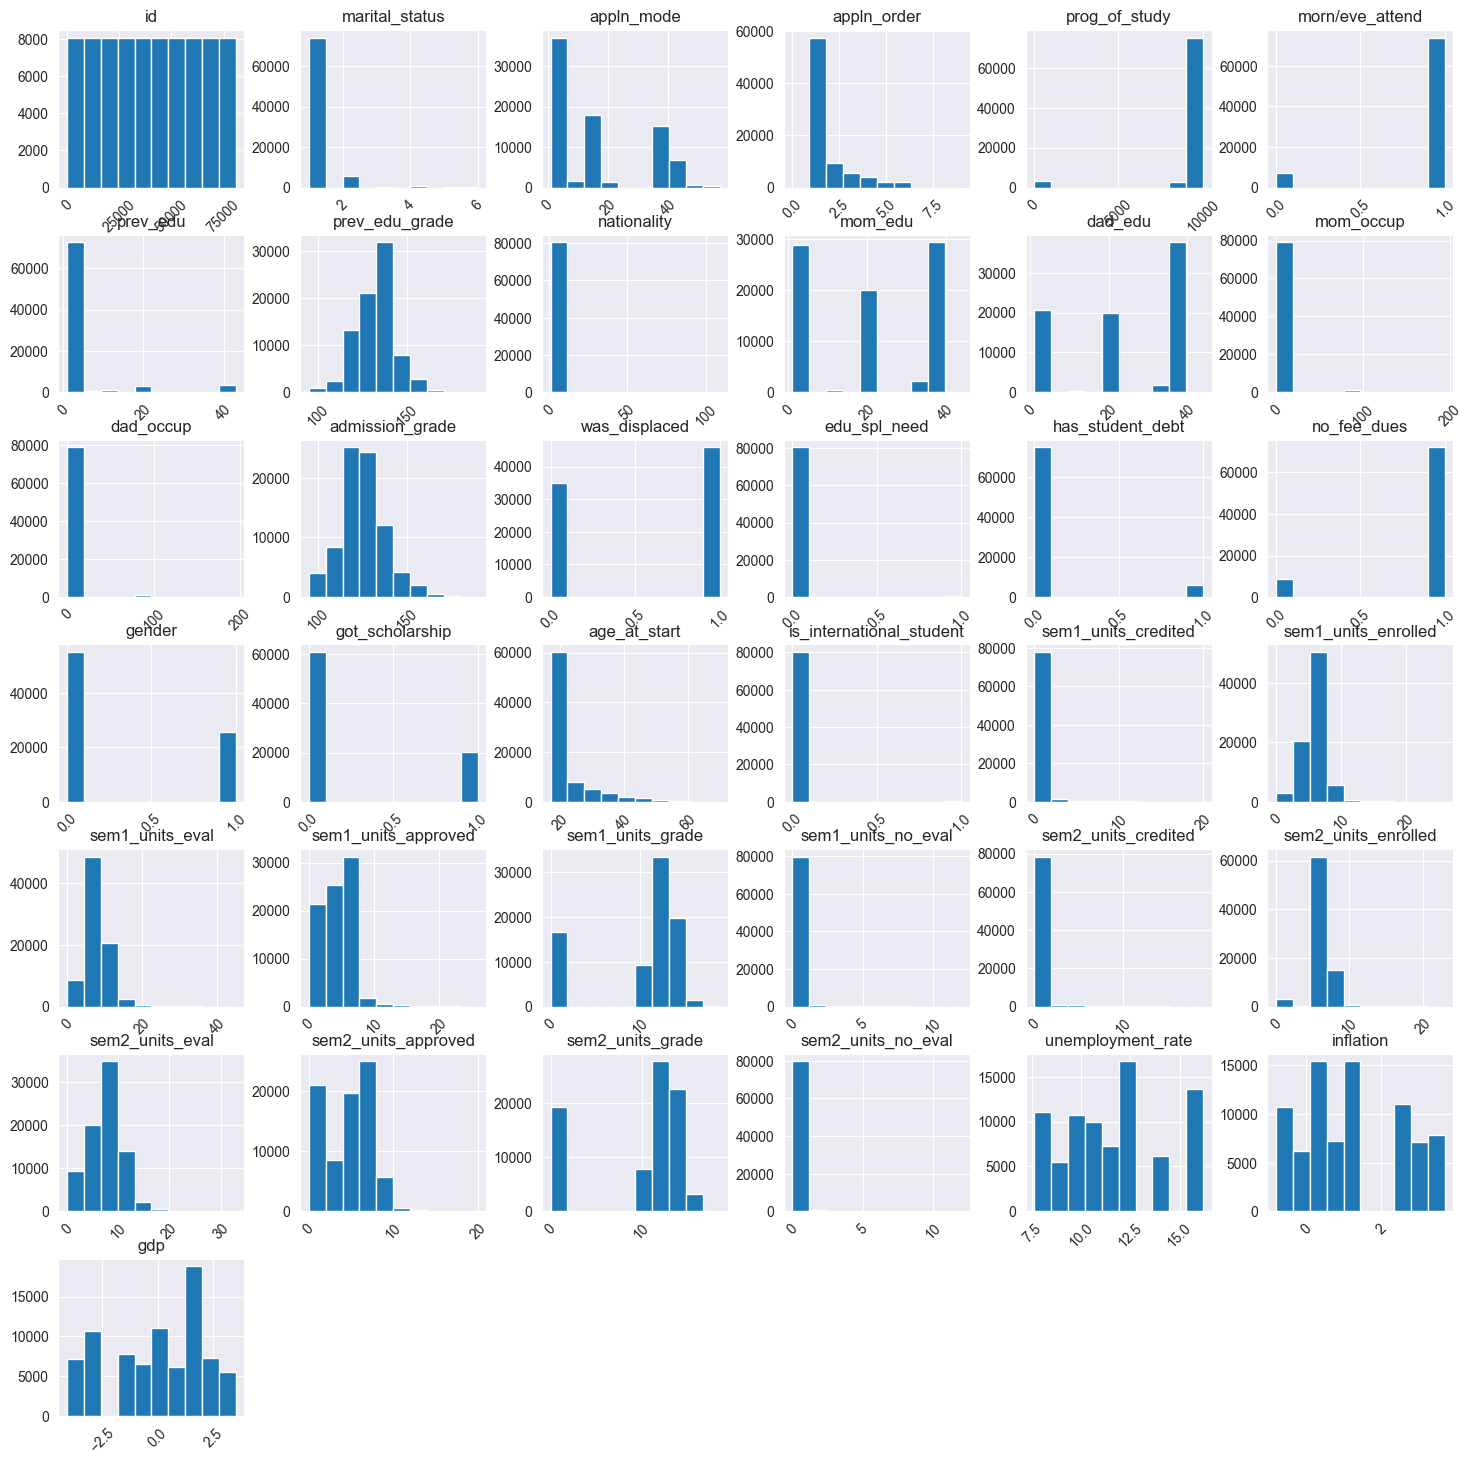

In [9]:
train_df.hist(figsize=(18,18), xrot=45)

Let's see how the target classes are distributed

<Axes: >

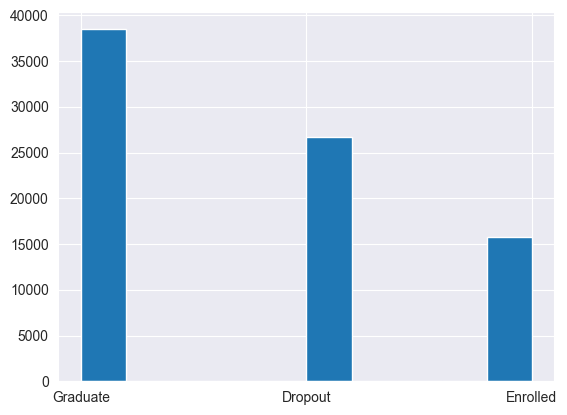

In [10]:
train_df['Target'].hist()

Let's see which factors affect the classes

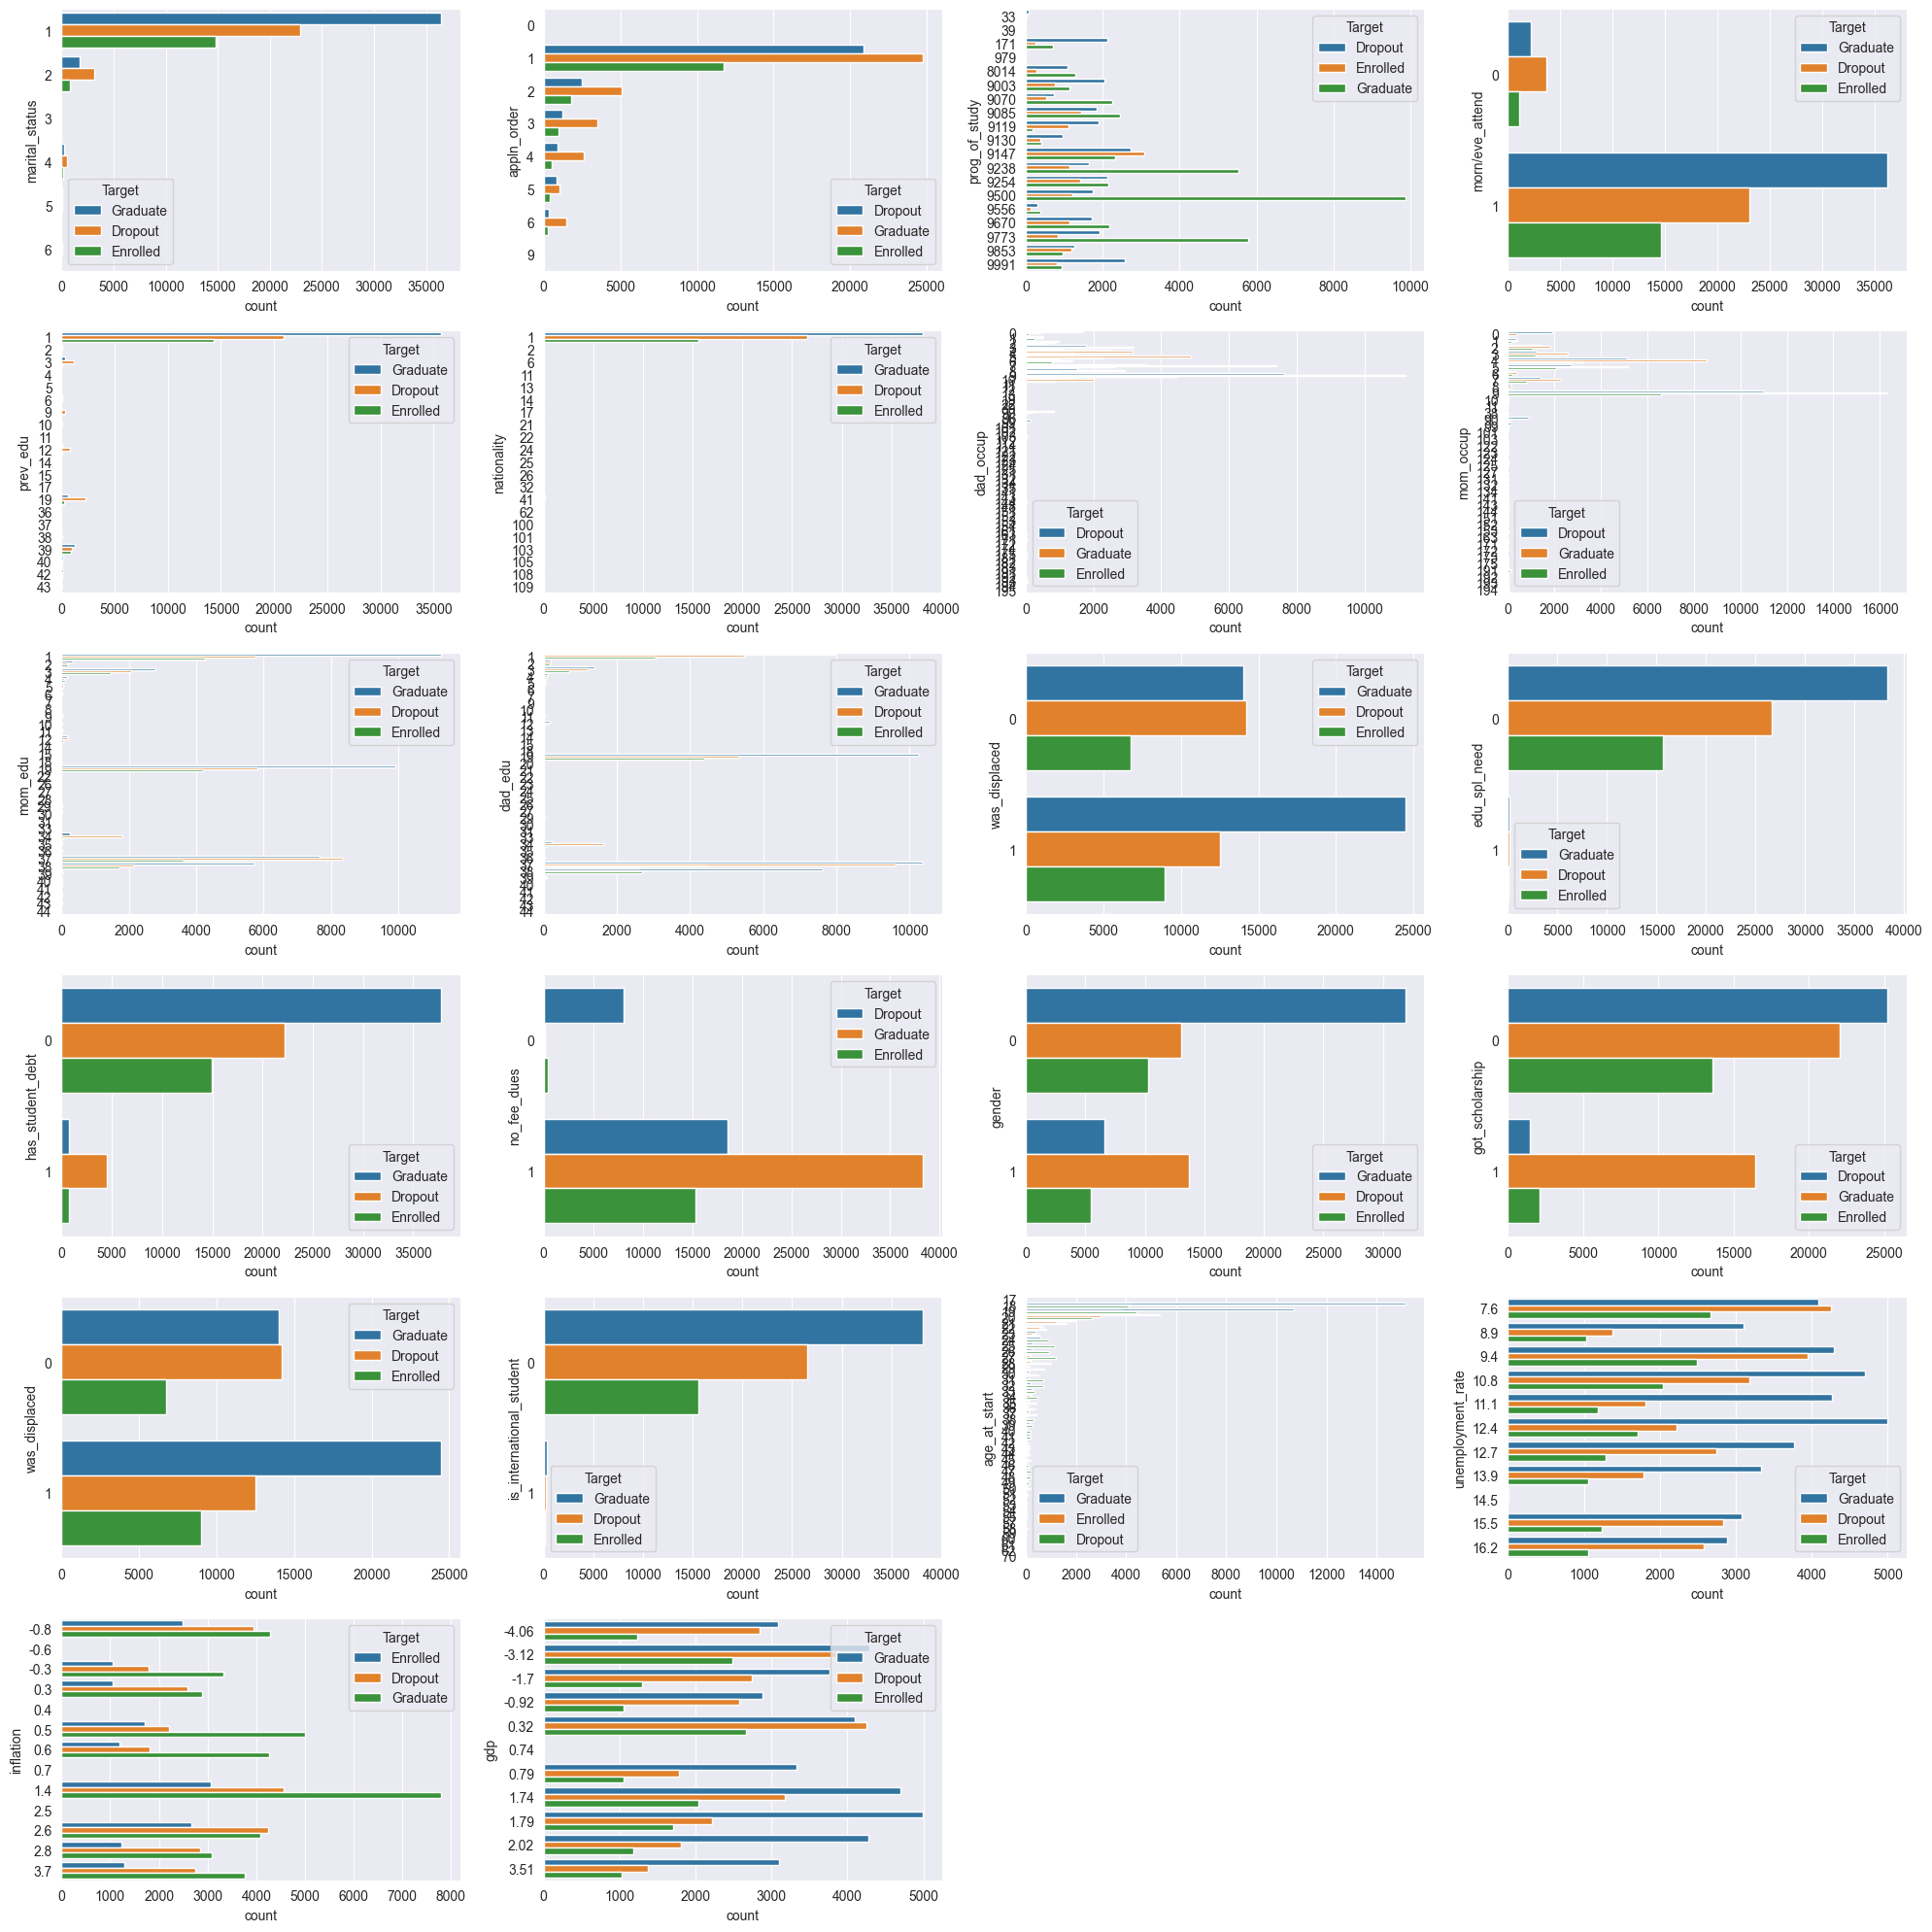

In [11]:
# cols = list(train_df.columns)[1:-1]
cols = ['marital_status','appln_order','prog_of_study','morn/eve_attend','prev_edu',
        'nationality','dad_occup','mom_occup','mom_edu','dad_edu','was_displaced','edu_spl_need',
        'has_student_debt','no_fee_dues','gender','got_scholarship','was_displaced',
        'is_international_student','age_at_start','unemployment_rate','inflation','gdp'
        ]

r, c = 6, 4
fig, axes = plt.subplots(r, c, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axes array to make iteration easier
axes = axes.flatten()

for i in range(r * c):
    if i < len(cols):
        ax = axes[i]
        sns.countplot(data=train_df, y=cols[i], hue="Target", ax=ax)
    else:
        fig.delaxes(axes[i])  # Remove unused axes

plt.tight_layout()
plt.show()

## Outliers

Let us see if the featurs have any outliers

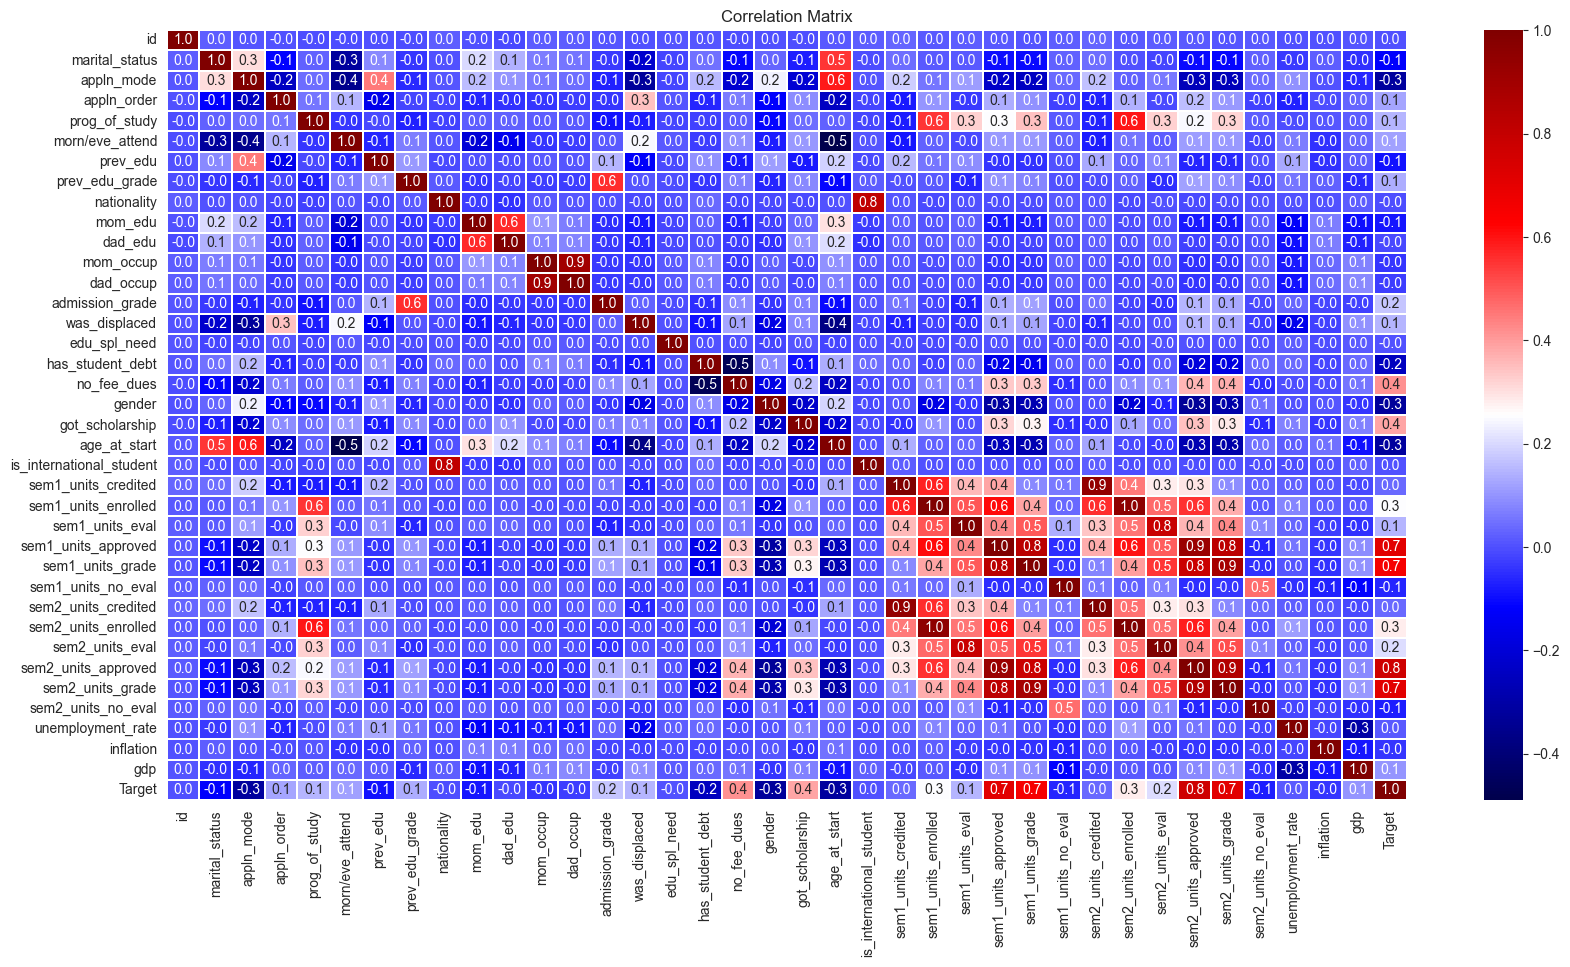

id  marital_status  appln_mode  appln_order  \
id                        1.000000  0.021907        0.010516   -0.000328      
marital_status            0.021907  1.000000        0.304048   -0.114030      
appln_mode                0.010516  0.304048        1.000000   -0.240678      
appln_order              -0.000328 -0.114030       -0.240678    1.000000      
prog_of_study            -0.005303  0.024418        0.041384    0.054219      
morn/eve_attend          -0.005968 -0.319551       -0.351977    0.147536      
prev_edu                  0.004630  0.082878        0.449548   -0.156775      
prev_edu_grade           -0.001251 -0.036181       -0.058930   -0.017357      
nationality               0.017758  0.004090        0.006511   -0.016263      
mom_edu                  -0.000389  0.197111        0.160757   -0.062354      
dad_edu                  -0.009633  0.142625        0.100282   -0.046580      
mom_occup                 0.017798  0.066885        0.062773   -0.036694      
dad_occup                 0.017322  0.053086        0.045612   -0.028649      
admission_grade           0.009250 -0.033614       -0.066342   -0.039310      
was_displaced             0.001536 -0.216976       -0.322179    0.346814      
edu_spl_need              0.008606 -0.012701       -0.013063    0.008750      
has_student_debt          0.009971  0.048975        0.152083   -0.059450      
no_fee_dues              -0.001803 -0.108402       -0.212138    0.064150      
gender                    0.003501  0.028687        0.236048   -0.120165      
got_scholarship          -0.002529 -0.073714       -0.206525    0.091645      
age_at_start              0.012302  0.549529        0.589248   -0.241567      
is_international_student  0.018702 -0.005749        0.007292   -0.016962      
sem1_units_credited       0.029293  0.045309        0.180914   -0.076750      
sem1_units_enrolled       0.014800  0.014256        0.056931    0.099313      
sem1_units_eval           0.020406  0.015077        0.111927   -0.032880      
sem1_units_approved       0.015081 -0.099074       -0.229865    0.136433      
sem1_units_grade          0.010265 -0.100085       -0.239925    0.095522      
sem1_units_no_eval        0.019497  0.026156        0.035400   -0.018736      
sem2_units_credited       0.029358  0.043288        0.167322   -0.070225      
sem2_units_enrolled       0.014396  0.000462        0.023567    0.141108      
sem2_units_eval           0.016853 -0.015797        0.057424   -0.007502      
sem2_units_approved       0.012589 -0.104500       -0.260595    0.160896      
sem2_units_grade          0.009915 -0.107034       -0.262041    0.103832      
sem2_units_no_eval        0.013564  0.026397        0.044771   -0.018695      
unemployment_rate         0.000095 -0.033176        0.097974   -0.067837      
inflation                 0.000626  0.018661        0.003911   -0.004604      
gdp                       0.005856 -0.044295       -0.063134    0.031884      
Target                    0.004587 -0.119867       -0.318380    0.126245      

                          prog_of_study  morn/eve_attend  prev_edu  \
id                       -0.005303      -0.005968         0.004630   
marital_status            0.024418      -0.319551         0.082878   
appln_mode                0.041384      -0.351977         0.449548   
appln_order               0.054219       0.147536        -0.156775   
prog_of_study             1.000000      -0.041293        -0.010469   
morn/eve_attend          -0.041293       1.000000        -0.059220   
prev_edu                 -0.010469      -0.059220         1.000000   
prev_edu_grade           -0.070404       0.066151         0.105275   
nationality              -0.020928       0.006831        -0.011486   
mom_edu                   0.020415      -0.199732         0.000217   
dad_edu                   0.025008      -0.146855        -0.003631   
mom_occup                 0.016625      -0.038749         0.012818   
dad_occup                 0.016273      

In [12]:
from sklearn.preprocessing import LabelEncoder

def plot_corr(df):
    df1 = df.copy()
    le = LabelEncoder()
    df1['Target'] = le.fit_transform(df1['Target'])
    corr = df1.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr, annot=True,cmap='seismic', fmt=".1f", linewidths=0.1)
    plt.title('Correlation Matrix')
    plt.show()

    return corr

plot_corr(train_df)

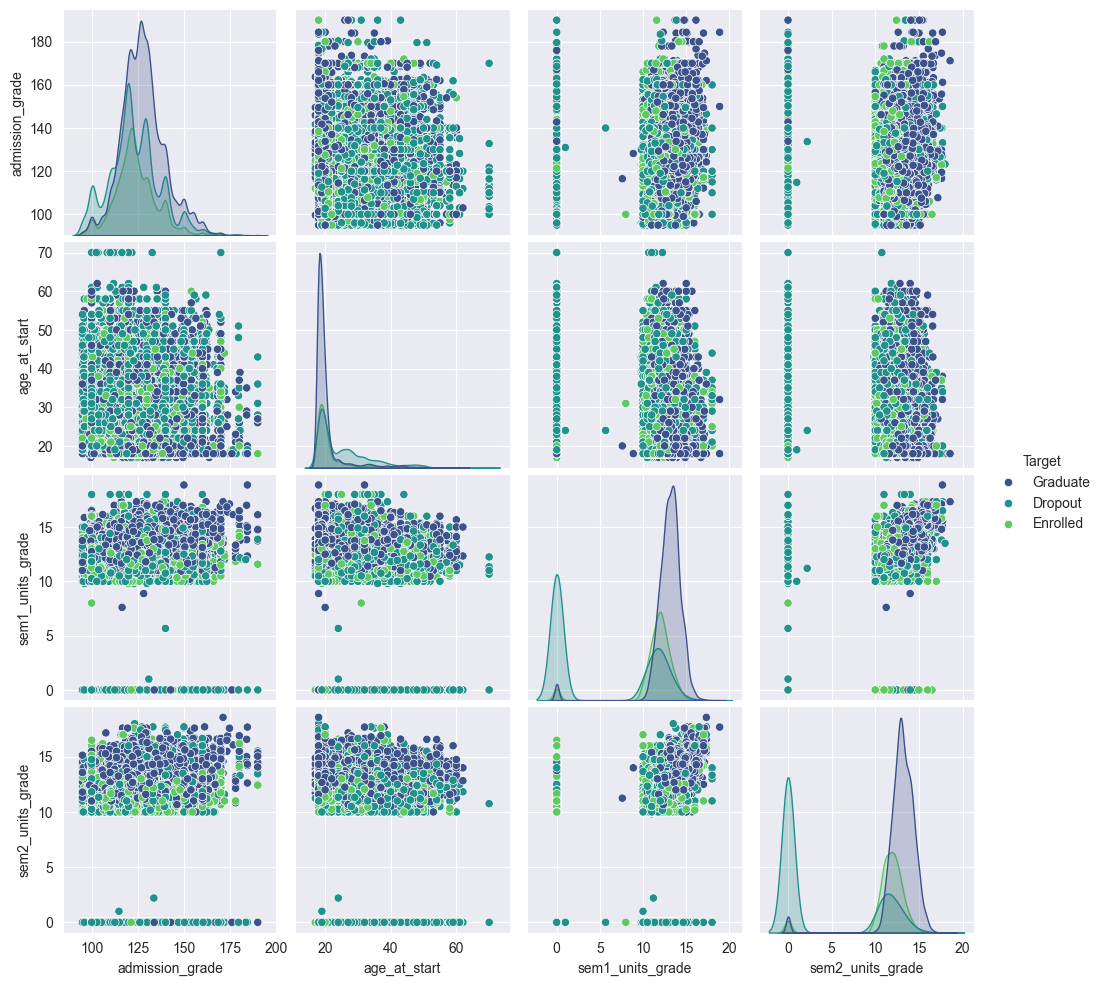

In [13]:
selected_feats = ['admission_grade', 'age_at_start', 'sem1_units_grade', 'sem2_units_grade', 'Target']

sns.pairplot(data=train_df[selected_feats],hue='Target',palette='viridis')
plt.show()

For `Dropout` class can be characterized by their low sem1 grades, whereas `Graduate` class can be characterized by consistently high grades in sem1 as well as sem2

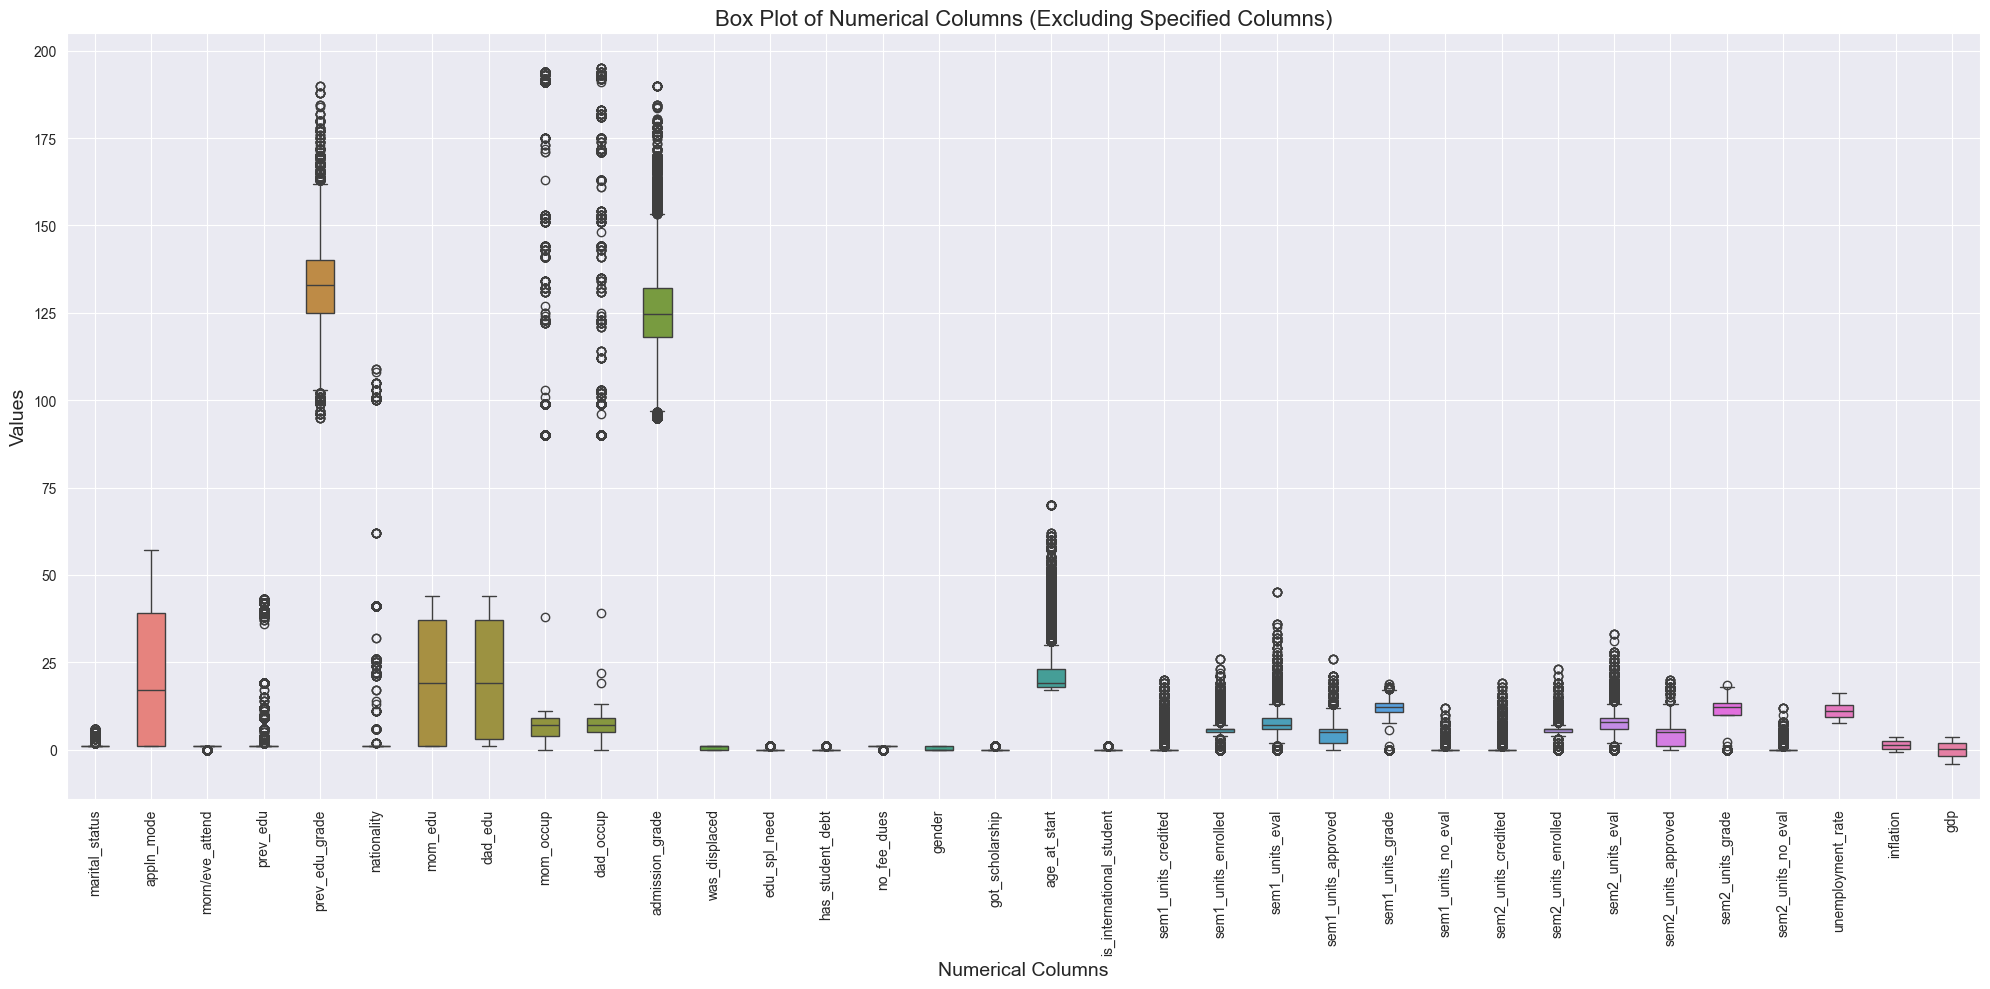

In [14]:
def plot_boxes(df,exclude_columns):
    numerical_cols = df.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df[numerical_cols], orient='v', width=0.5)
    plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
    plt.xlabel('Numerical Columns', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
exclude_columns = ['id', 'appln_order', 'prog_of_study']
plot_boxes(train_df,exclude_columns)

### Discrete Numerical Features

In [15]:
def get_outliers(df, m:float=1.5):

    qr1 = df.quantile(.25)
    qr3 = df.quantile(.75)

    IQR = qr3 - qr1 # inter quantile range

    outliers = df[((df<(qr1-m*IQR)) | (df>(qr3+m*IQR)))]

    return outliers

def plot_dist(col,df=train_df):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

In [16]:
train_df.shape

(80942, 38)

We start with `age_at_start`

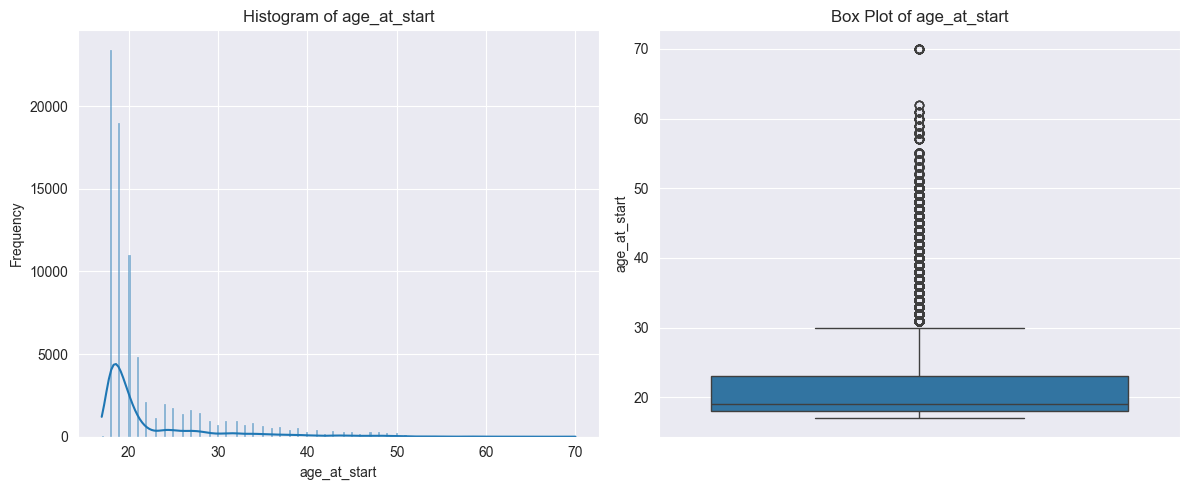

In [17]:
plot_dist('age_at_start')


In [18]:
age_at_Start_out = get_outliers(train_df['age_at_start'],m=3.0)
age_at_Start_out.describe()['count']/train_df.shape[0], age_at_Start_out.describe()

(0.04923278396876776,
 count    3985.000000
 mean     45.147804  
 std      5.146399   
 min      39.000000  
 25%      41.000000  
 50%      44.000000  
 75%      48.000000  
 max      70.000000  
 Name: age_at_start, dtype: float64)

<Axes: >

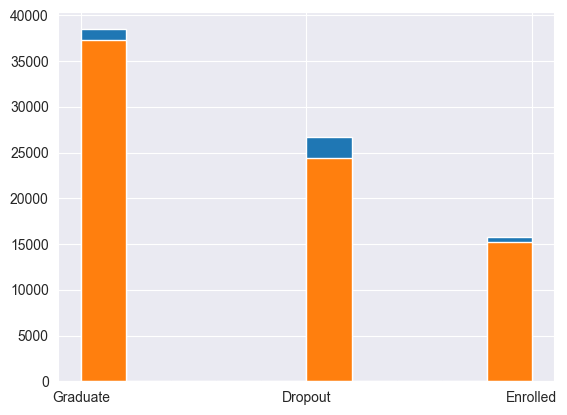

In [19]:
train_df['Target'].hist(),
train_df.drop(index=age_at_Start_out.index)['Target'].hist()

We can remove these outliers for better accuracy. Next, we handle `marital_status`.

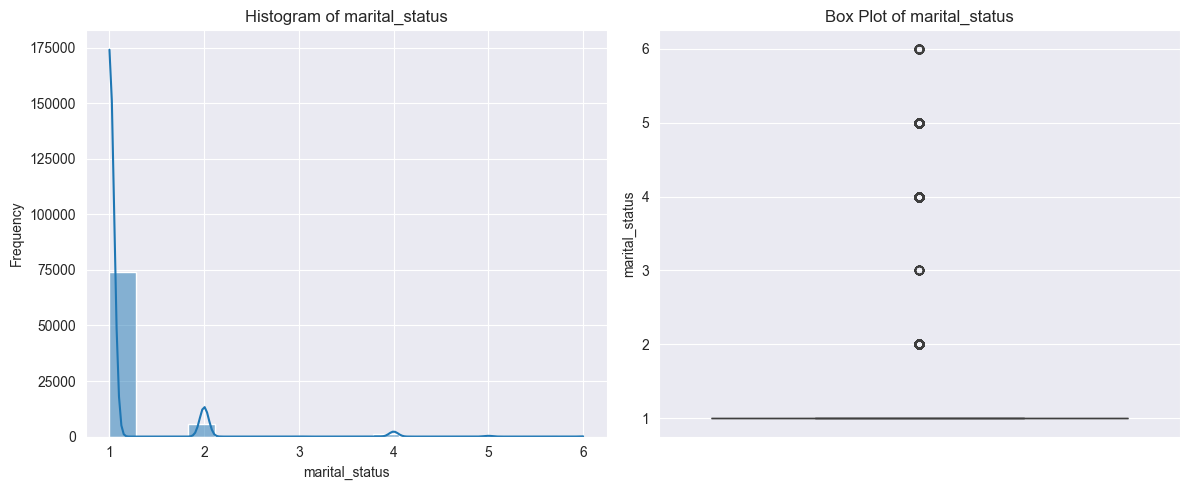

In [20]:
plot_dist('marital_status')

In [21]:
train_df[train_df['marital_status'] > 2]['marital_status'].describe()['count']/train_df.shape[0], train_df[train_df['marital_status'] > 2]['marital_status'].describe()

(0.014318895011242618,
 count    1159.000000
 mean     4.175151   
 std      0.499952   
 min      3.000000   
 25%      4.000000   
 50%      4.000000   
 75%      4.000000   
 max      6.000000   
 Name: marital_status, dtype: float64)

In [22]:
mar_out = train_df[train_df['marital_status'] > 2]['marital_status']
mar_out.describe()

count    1159.000000
mean     4.175151   
std      0.499952   
min      3.000000   
25%      4.000000   
50%      4.000000   
75%      4.000000   
max      6.000000   
Name: marital_status, dtype: float64

Here we see the `marital_status` of categories other than `1` and `2` constitute around `1.5%` of the data - so these could be fault in data collection and can be removed. Next, we deal with `prev_edu`.

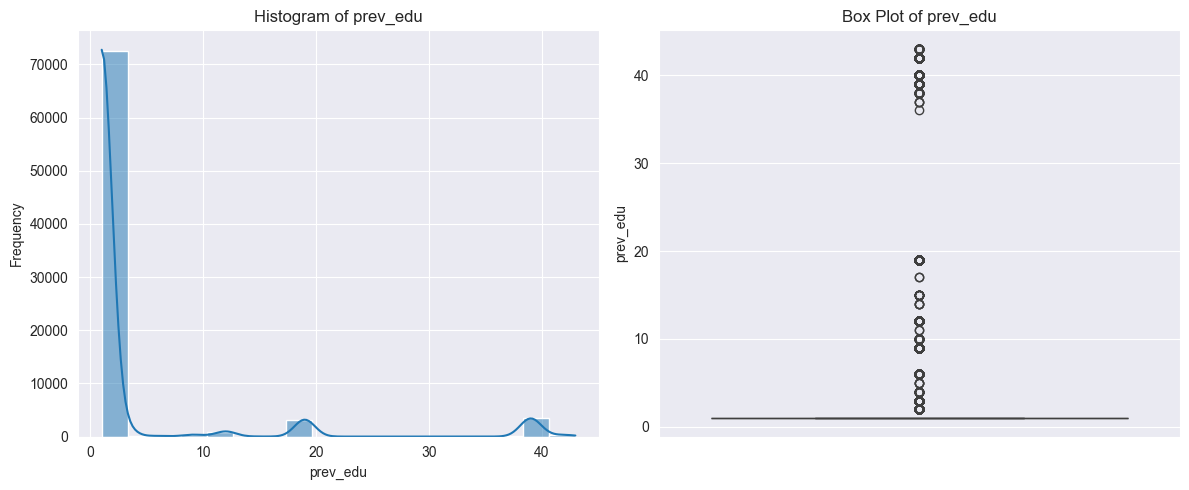

In [23]:
plot_dist('prev_edu')

<Axes: >

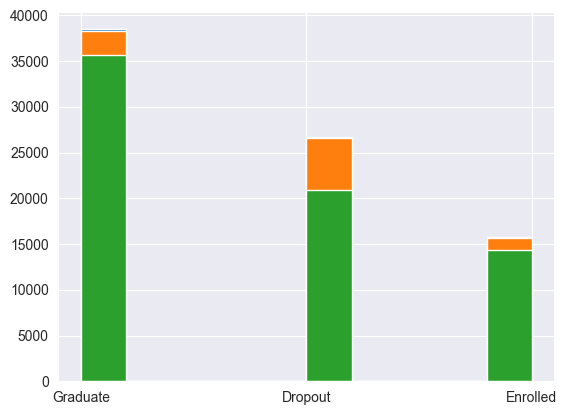

In [24]:
prev_edu_out1 = get_outliers(train_df['prev_edu'])
prev_edu_out2 = train_df[train_df['prev_edu']>40]['prev_edu']
train_df['Target'].hist(),
train_df.drop(index=prev_edu_out2.index)['Target'].hist(),
train_df.drop(index=prev_edu_out1.index)['Target'].hist()

In [25]:
prev_edu_out2.describe()['count']/train_df.shape[0], prev_edu_out2.describe()

(0.0038299028934298636,
 count    310.000000
 mean     42.145161 
 std      0.352833  
 min      42.000000 
 25%      42.000000 
 50%      42.000000 
 75%      42.000000 
 max      43.000000 
 Name: prev_edu, dtype: float64)

These constitute `~0.4%` of the entire data - removal does not affect distribution of targets. So, we can remove these `310` entries. Next, we deal with the `nationality`.

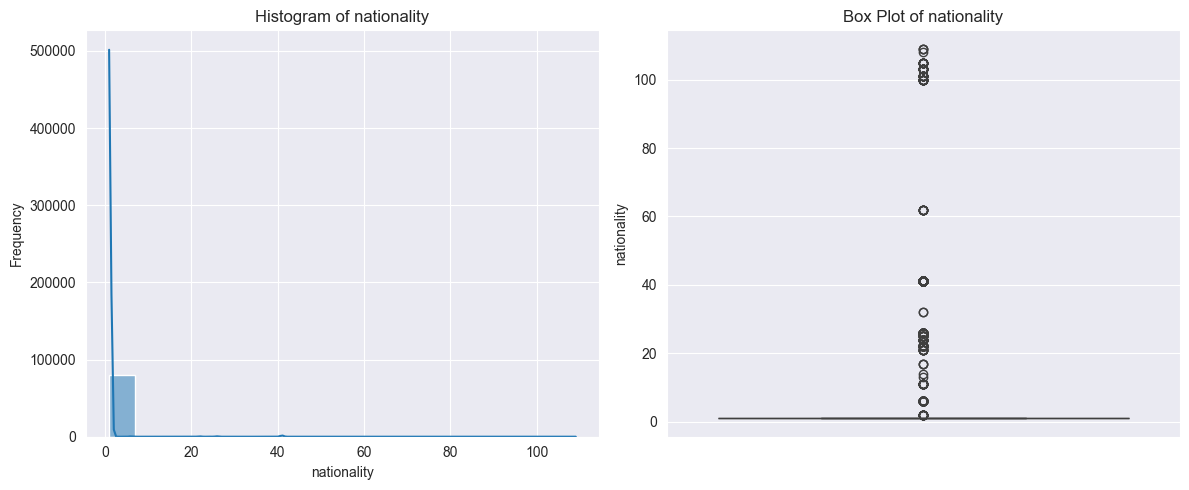

In [26]:
plot_dist('nationality')

0.007598033159546342

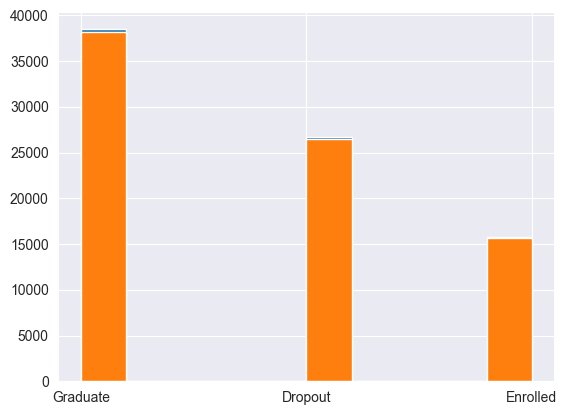

In [27]:
nat_out = get_outliers(train_df['nationality'],m=1.5)
train_df['Target'].hist(),
train_df.drop(index=nat_out.index)['Target'].hist(),
nat_out.describe()['count']/train_df.shape[0]

We can safely remove these `615` entries since removal od these does not affect distribution of  (`~0.8%` of the entire data). Next, let us deal with `mom_occup` and `dad_occup` columns (their educational qualification columns are not problematic).

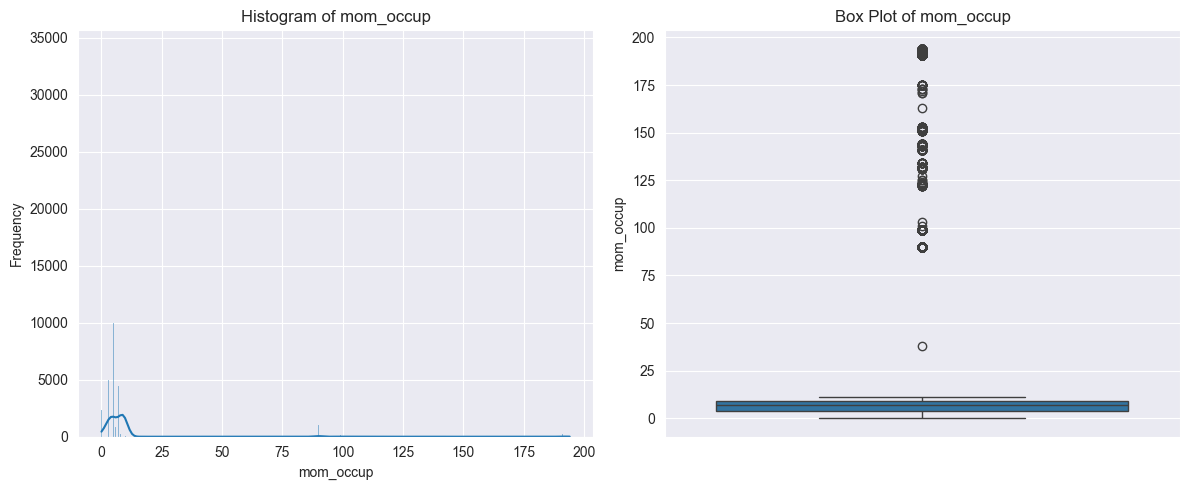

In [28]:
plot_dist('mom_occup')

<Axes: >

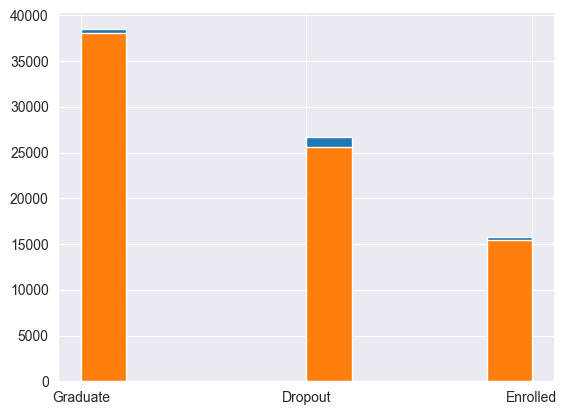

In [29]:
mom_occup_out = get_outliers(train_df['mom_occup'], m=3.0)
train_df['Target'].hist(),
train_df.drop(index=mom_occup_out.index)['Target'].hist()

In [30]:
mom_occup_out.value_counts()

mom_occup
90     1048
191    238 
99     155 
194    90  
141    59  
123    51  
144    31  
192    28  
193    17  
175    16  
152    15  
134    15  
151    14  
132    14  
143    12  
153    10  
122    8   
131    7   
173    3   
171    2   
125    2   
172    1   
127    1   
103    1   
163    1   
38     1   
124    1   
101    1   
Name: count, dtype: int64

We add back `90`,`191` and `99` since they contribute to te distribution.

In [31]:
mom_occup_out = mom_occup_out[~mom_occup_out.isin([90,99,191])]
mom_occup_out.describe()

count    401.000000
mean     157.862843
std      28.460739 
min      38.000000 
25%      134.000000
50%      144.000000
75%      193.000000
max      194.000000
Name: mom_occup, dtype: float64

In [32]:
train_df['mom_occup'].describe(),  train_df.drop(index=mom_occup_out.index)['mom_occup'].describe()

(count    80942.000000
 mean     8.713153    
 std      18.083198   
 min      0.000000    
 25%      4.000000    
 50%      7.000000    
 75%      9.000000    
 max      194.000000  
 Name: mom_occup, dtype: float64,
 count    80541.000000
 mean     7.970562    
 std      14.604697   
 min      0.000000    
 25%      4.000000    
 50%      6.000000    
 75%      9.000000    
 max      191.000000  
 Name: mom_occup, dtype: float64)

We definitely remove these since not removing will cause serious loss in accuracy (significant difference in `std`). Let us check for `dad_occup`

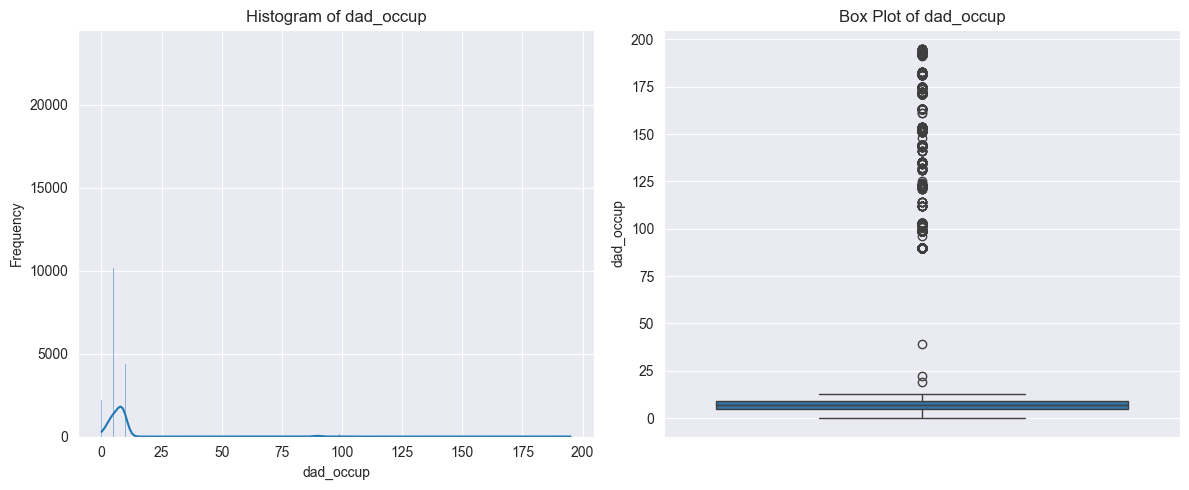

In [33]:
plot_dist('dad_occup')

In [34]:
train_df[['mom_occup','dad_occup']].corr()

mom_occup  dad_occup
mom_occup  1.000000   0.896927 
dad_occup  0.896927   1.000000

We see that `mom_occup` and `dad_occup` have strong correlation, so to avoid the redundancy we can remove one of the columns. Here we remove the `dad_occup` column.

In [35]:
train_df[['nationality','is_international_student']].corr()

nationality  is_international_student
nationality               1.000000     0.812255                
is_international_student  0.812255     1.000000

These two columns have a high correlation. To avoid redundancy, we remove the `is_international_student` column. Next, we have a look at the `appln_order` column

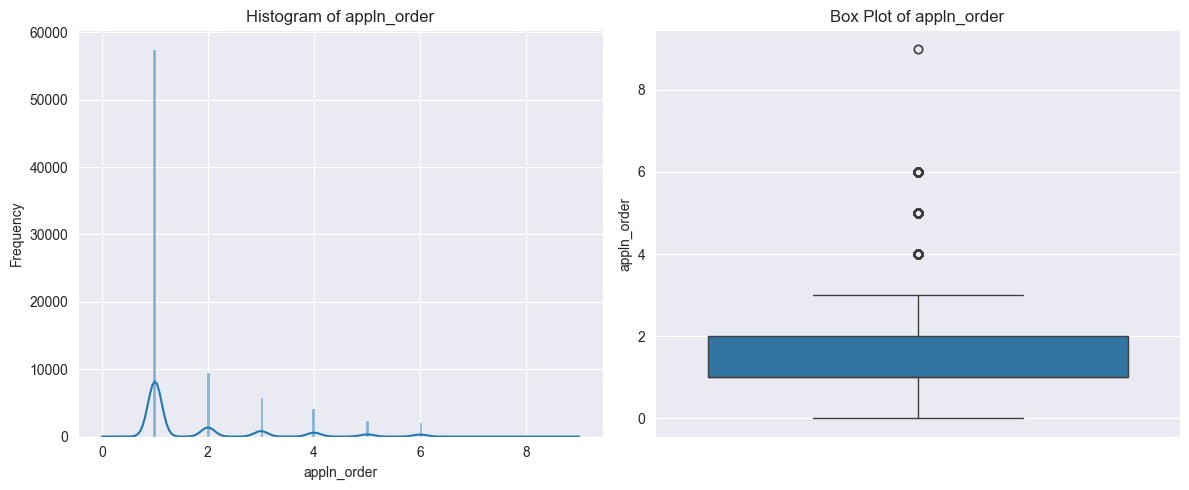

In [36]:
plot_dist('appln_order')

In [37]:
appln_order_out1 = get_outliers(train_df['appln_order'],m=3.0)
appln_order_out2 = train_df[train_df['appln_order']>=8]['appln_order']
appln_order_out1.describe(), appln_order_out2.describe()

(count    2086.000000
 mean     6.002876   
 std      0.092870   
 min      6.000000   
 25%      6.000000   
 50%      6.000000   
 75%      6.000000   
 max      9.000000   
 Name: appln_order, dtype: float64,
 count    2.0
 mean     9.0
 std      0.0
 min      9.0
 25%      9.0
 50%      9.0
 75%      9.0
 max      9.0
 Name: appln_order, dtype: float64)

In [38]:
appln_order_out1.value_counts()

appln_order
6    2084
9    2   
Name: count, dtype: int64

Here, we retain the `6` since it is a large portion of the data
We can remove these entries. Next we look at `prog_of_study` column.

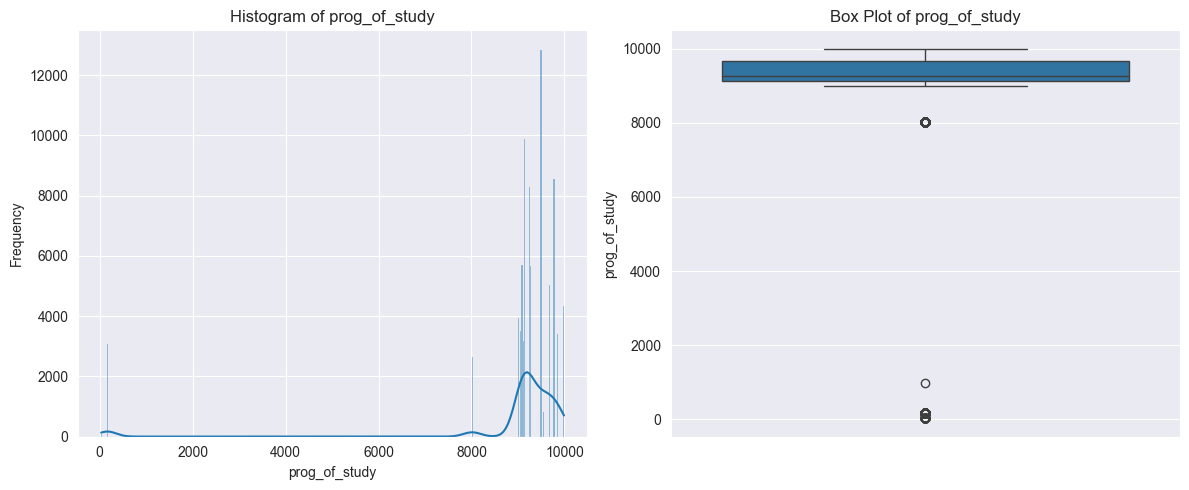

In [39]:
plot_dist('prog_of_study')

In [40]:
prog_out = get_outliers(train_df['prog_of_study'],m=3)
prog_out.describe()

count    3160.000000
mean     167.545570 
std      26.582699  
min      33.000000  
25%      171.000000 
50%      171.000000 
75%      171.000000 
max      979.000000 
Name: prog_of_study, dtype: float64

In [41]:
prog_out.value_counts()

prog_of_study
171    3074
33     84  
979    1   
39     1   
Name: count, dtype: int64

In [42]:
org_df['Course'].value_counts()

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556    86 
33      12 
Name: count, dtype: int64

So, the `39` was a erroneous entry, it should have been `33`. Since, its fraction is too small, we ignore `33` and `979`.

In [43]:
prog_ind = prog_out[prog_out==171].index
prog_out.drop(index=prog_ind,inplace=True)
prog_out.describe()

count    86.000000 
mean     44.069767 
std      102.004243
min      33.000000 
25%      33.000000 
50%      33.000000 
75%      33.000000 
max      979.000000
Name: prog_of_study, dtype: float64

In [44]:
len(age_at_Start_out.index), len(mar_out.index), len(prev_edu_out2.index), len(nat_out.index), len(mom_occup_out.index), len(appln_order_out2.index), len(prog_out.index)

(3985, 1159, 310, 615, 401, 2, 86)

Now, let's summarize the required changes:

| Column | Count of outliers | Outliers dealt | Reason |
| ------ | ----------------- | -------------- | ------ |
| `age_at_start` | 3985 | remove them | These entries are beyond expected range. Capping them will skew the target distribution but removing them doesn't |
| `marital_status` | 1159 | remove them | Categories `3`, `4`, `5` and `6` constitute around `1.5%` of the total data - could be error in data collection |
| `prev_edu` | 310 | remove them | removal does not affect distribution of targets (`~0.4%` of the entire data) |
| `nationality` | 615 | remove them | removal does not affect distribution of  (`~0.8%` of the entire data) |
| `mom_occup` | 401 | remove them | Altering will affect the distribution |
| `appln_order` | 2 | remove them | removal does not affect distribution of targets |
| `prog_of_study` | 86 | remove them | erroneous entries and small fraction of whole data |

- Remove `dad_occup` column since it has a high correlation with `mom_occup`
- Remove `is_international_student` column since it has a high correlation with `nationality`

Let's see the distribution of `Target` after these removals

<Axes: >

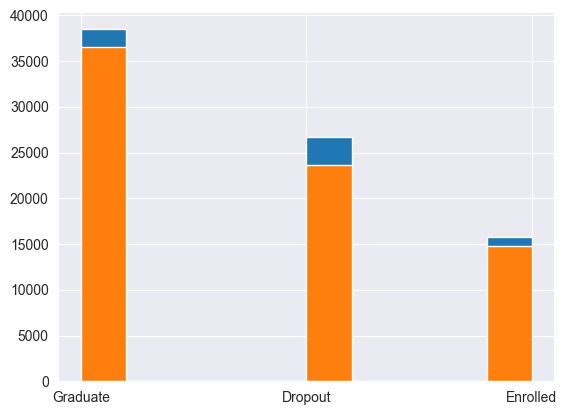

In [45]:
indices = list(set(list(age_at_Start_out.index) + list(mar_out.index) + list(prev_edu_out2.index) +
                   list(nat_out.index) + list(mom_occup_out.index) + list(appln_order_out2.index) + 
                   list(prog_out.index)
                ))
train_df['Target'].hist(),
train_df.drop(index=indices)['Target'].hist()

In [46]:
len(indices), train_df['Target'].value_counts()

(5924,
 Target
 Graduate    38491
 Dropout     26717
 Enrolled    15734
 Name: count, dtype: int64)

In [47]:
cols_to_drop = ['dad_occup','is_international_student']
train = train_df.drop(index=indices)
train = train.drop(columns=cols_to_drop)
train_df.shape, train.shape

((80942, 38), (75018, 36))

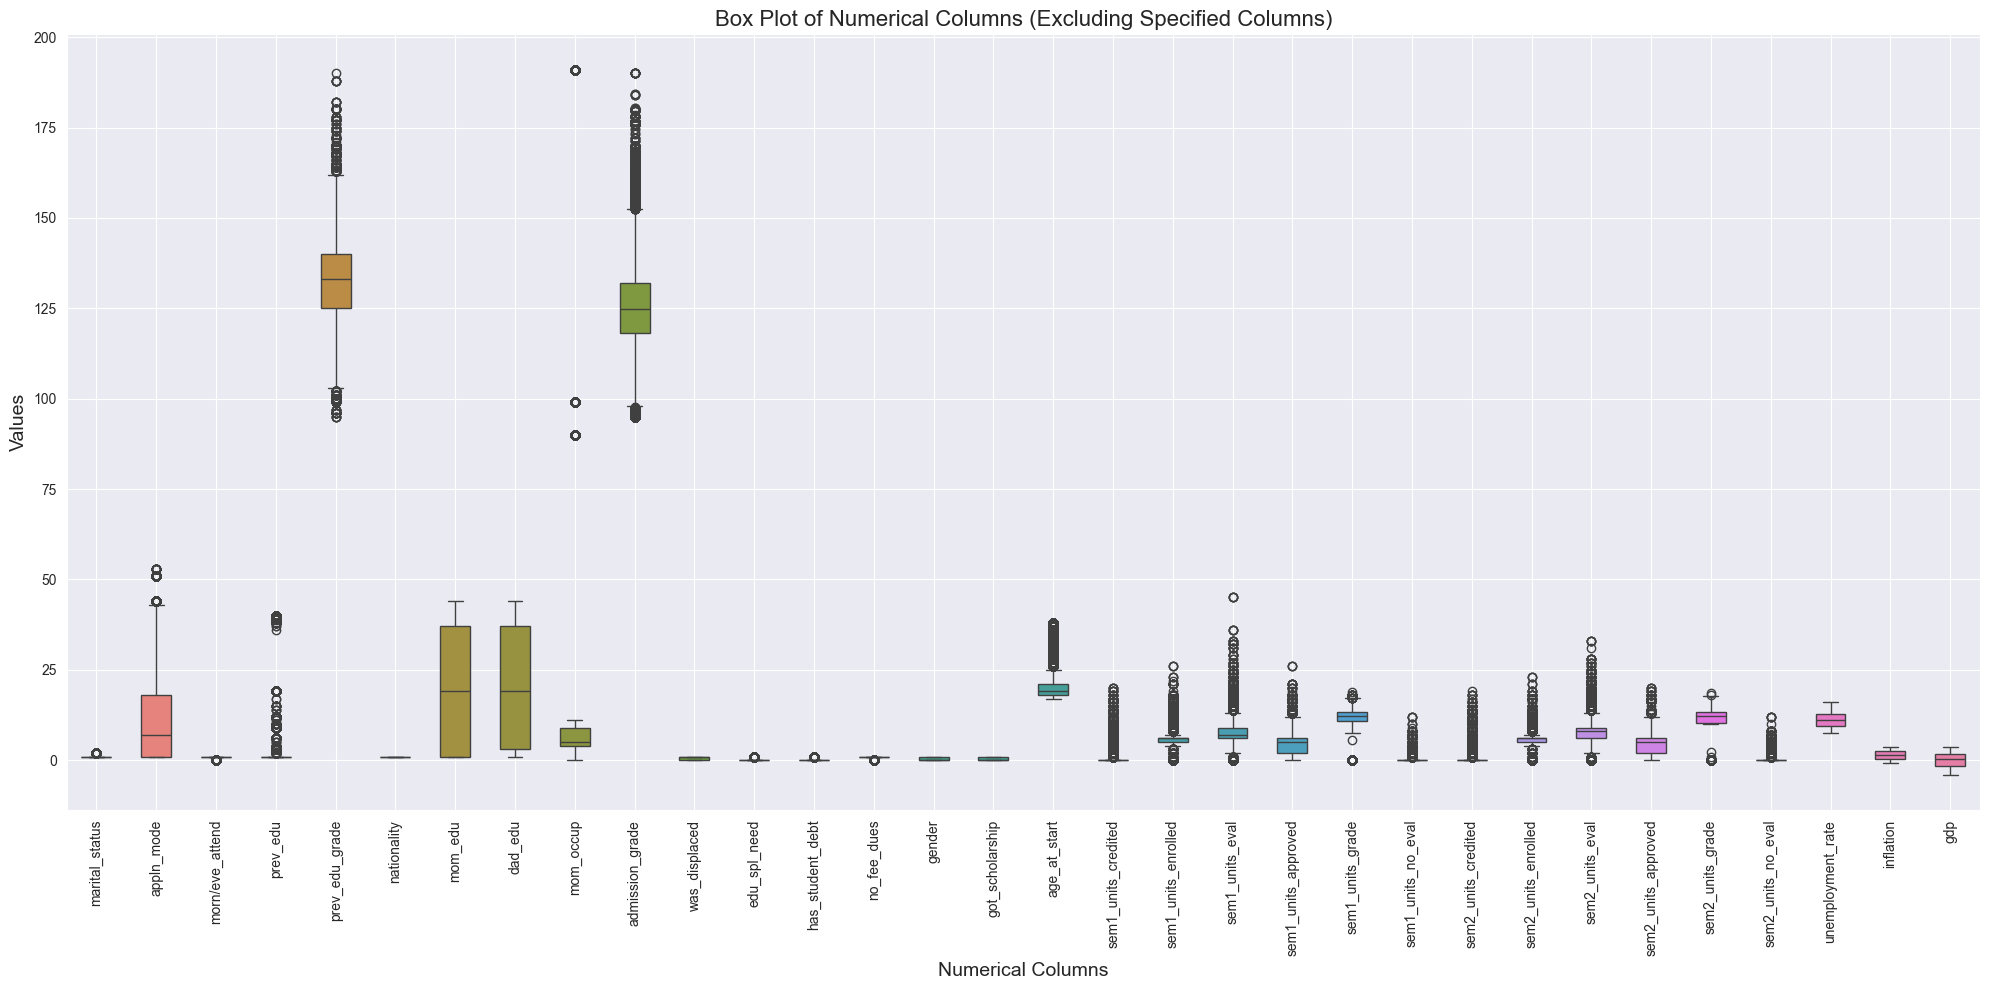

In [48]:
plot_boxes(train,exclude_columns)

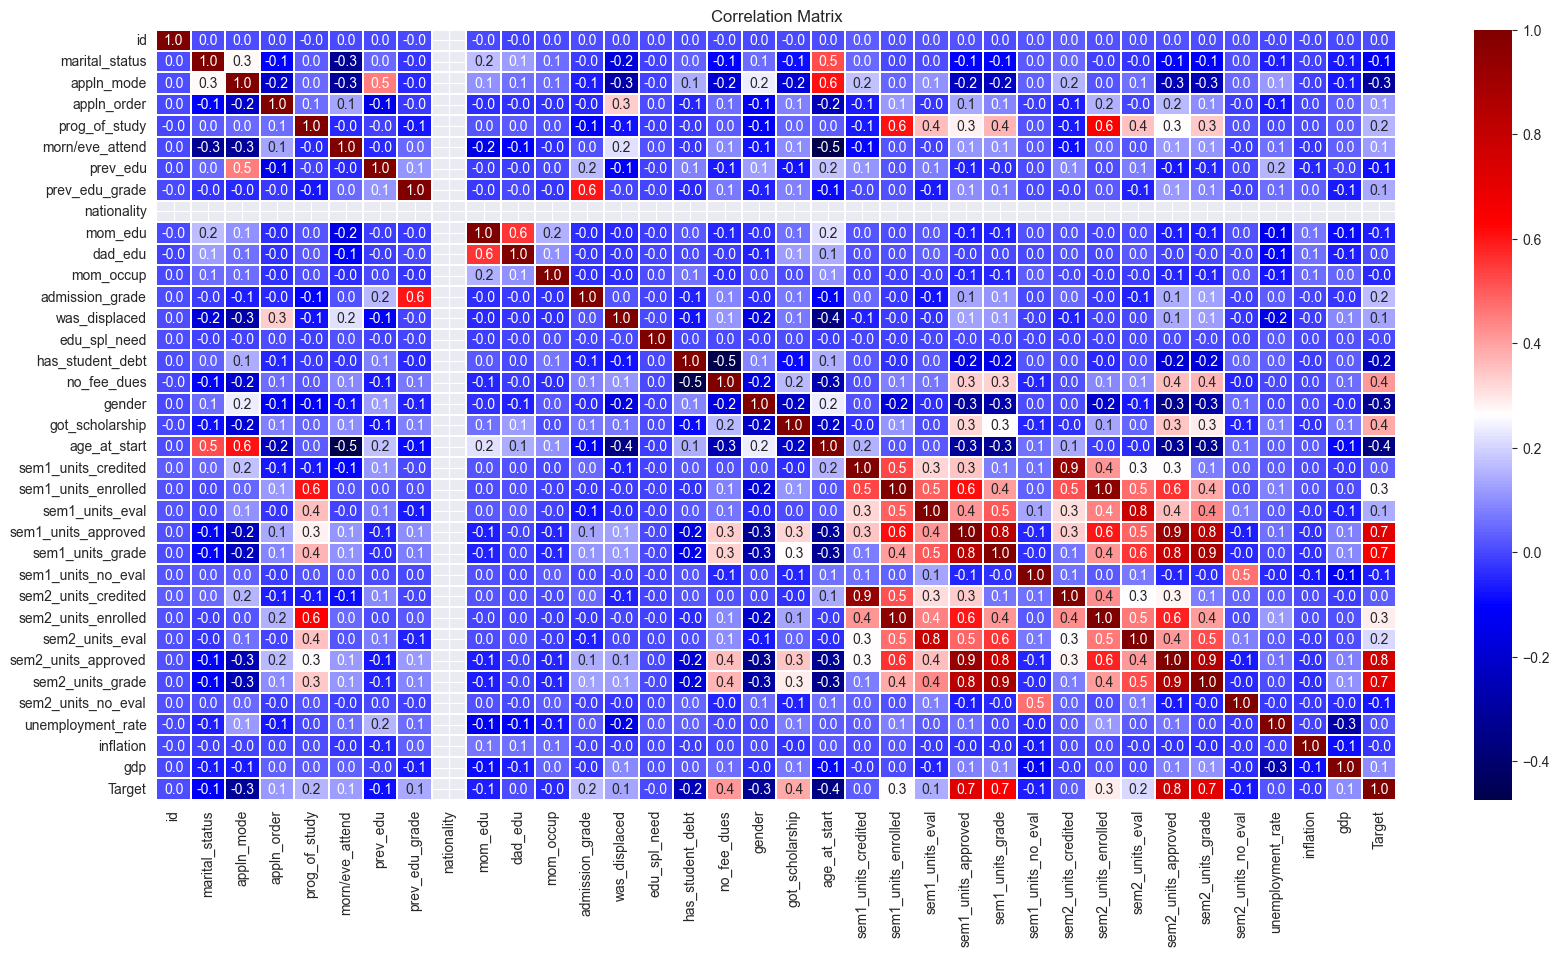

id  marital_status  appln_mode  appln_order  \
id                   1.000000  0.004878        0.005072    0.001807      
marital_status       0.004878  1.000000        0.272726   -0.100441      
appln_mode           0.005072  0.272726        1.000000   -0.215720      
appln_order          0.001807 -0.100441       -0.215720    1.000000      
prog_of_study       -0.006275  0.028514        0.046479    0.055500      
morn/eve_attend      0.000065 -0.328844       -0.318162    0.131721      
prev_edu             0.002291  0.045752        0.450217   -0.148516      
prev_edu_grade      -0.000080 -0.025391       -0.044105   -0.024774      
nationality         NaN       NaN             NaN         NaN            
mom_edu             -0.001610  0.165995        0.107279   -0.040792      
dad_edu             -0.009051  0.123391        0.059511   -0.032501      
mom_occup            0.002573  0.052218        0.055246   -0.030952      
admission_grade      0.005568 -0.015040       -0.062503   -0.044741      
was_displaced        0.004036 -0.179382       -0.284350    0.337746      
edu_spl_need         0.007413 -0.012157       -0.009022    0.008724      
has_student_debt     0.006681  0.035021        0.145906   -0.052671      
no_fee_dues         -0.000936 -0.102607       -0.201443    0.054137      
gender               0.003595  0.052049        0.239675   -0.118775      
got_scholarship     -0.001171 -0.085755       -0.197475    0.084292      
age_at_start         0.004929  0.519964        0.607723   -0.248829      
sem1_units_credited  0.027804  0.044827        0.172496   -0.070669      
sem1_units_enrolled  0.011433  0.001842        0.043461    0.115004      
sem1_units_eval      0.017277  0.005764        0.105560   -0.028261      
sem1_units_approved  0.013507 -0.102786       -0.234259    0.137705      
sem1_units_grade     0.008876 -0.102296       -0.233680    0.089163      
sem1_units_no_eval   0.016531  0.021795        0.037872   -0.018663      
sem2_units_credited  0.027804  0.045332        0.158907   -0.064166      
sem2_units_enrolled  0.012500 -0.008832        0.015921    0.152466      
sem2_units_eval      0.014699 -0.027909        0.056146   -0.005407      
sem2_units_approved  0.012033 -0.103599       -0.259320    0.159402      
sem2_units_grade     0.008949 -0.106811       -0.255904    0.097216      
sem2_units_no_eval   0.012374  0.014030        0.044730   -0.017308      
unemployment_rate   -0.000908 -0.060874        0.115342   -0.071250      
inflation           -0.000697 -0.008637       -0.010891    0.000357      
gdp                  0.001767 -0.070699       -0.066292    0.033113      
Target               0.004978 -0.114044       -0.310497    0.117520      

                     prog_of_study  morn/eve_attend  prev_edu  prev_edu_grade  \
id                  -0.006275       0.000065         0.002291 -0.000080         
marital_status       0.028514      -0.328844         0.045752 -0.025391         
appln_mode           0.046479      -0.318162         0.450217 -0.044105         
appln_order          0.055500       0.131721        -0.148516 -0.024774         
prog_of_study        1.000000      -0.044365        -0.008885 -0.074709         
morn/eve_attend     -0.044365       1.000000        -0.047403  0.045456         
prev_edu            -0.008885      -0.047403         1.000000  0.107814         
prev_edu_grade      -0.074709       0.045456         0.107814  1.000000         
nationality         NaN            NaN              NaN       NaN               
mom_edu              0.018121      -0.153419        -0.015441 -0.020305         
dad_edu              0.023934      -0.110222        -0.015390 -0.001721         
mom_occup            0.015334      -0.039292         0.002145 -0.026233         
admission_grade     -0.106960       0.009732         0.162257  0.601361         
was_displaced       -0.077335       0.217123        -0.116306 -0.006118         
edu_spl_need        -0.014021       0.011278        -0.008147 -0.004594  

In [49]:
plot_corr(train)

In [50]:
from scipy.stats import skew

def handle_skew(df):
    numerical_features = df.select_dtypes(include=[np.number])
    skewness = numerical_features.apply(lambda x: skew(x.dropna()))
    skewed_features = skewness[abs(skewness) > 1]
    
    for col in skewed_features.index:
        if df[col].min() > -1: 
            df[f'{col}_log'] = np.log1p(df[col])
    return df

train1 = handle_skew(train)

Let's see if the skewness is handled

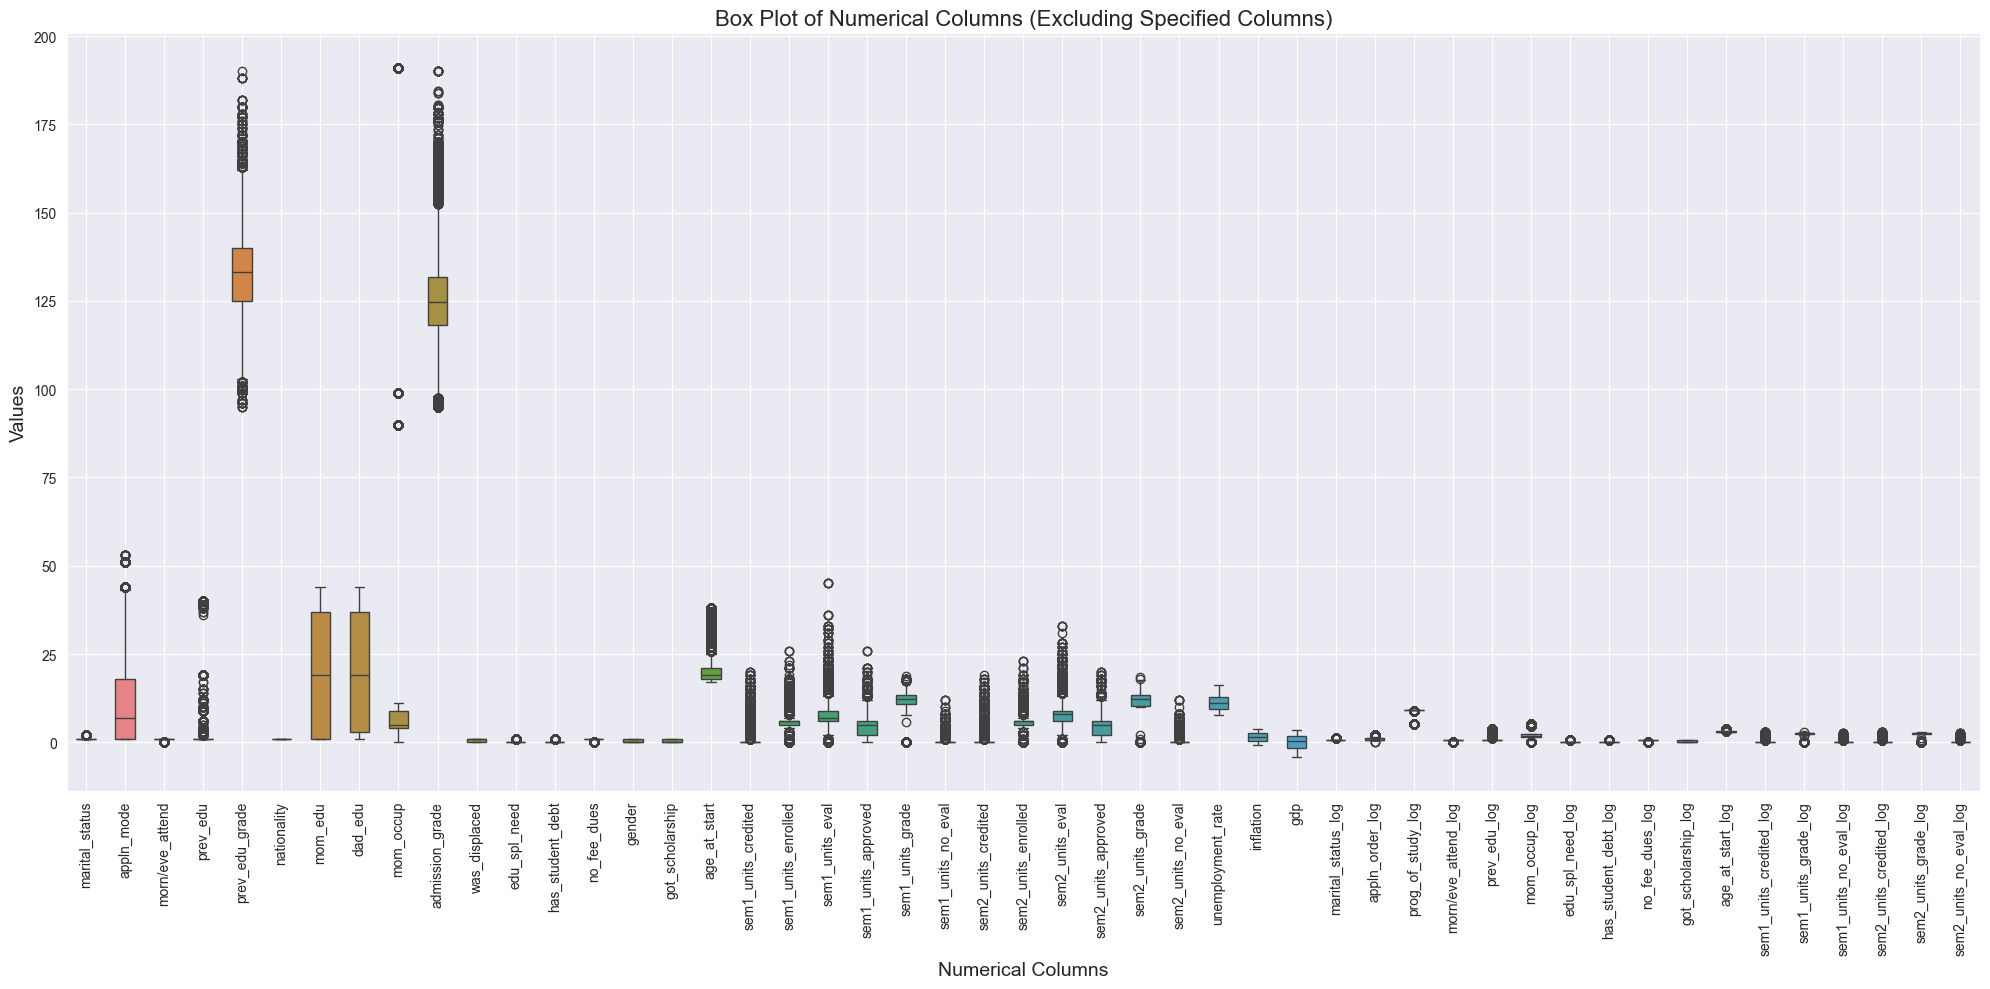

In [51]:
plot_boxes(train1,exclude_columns)

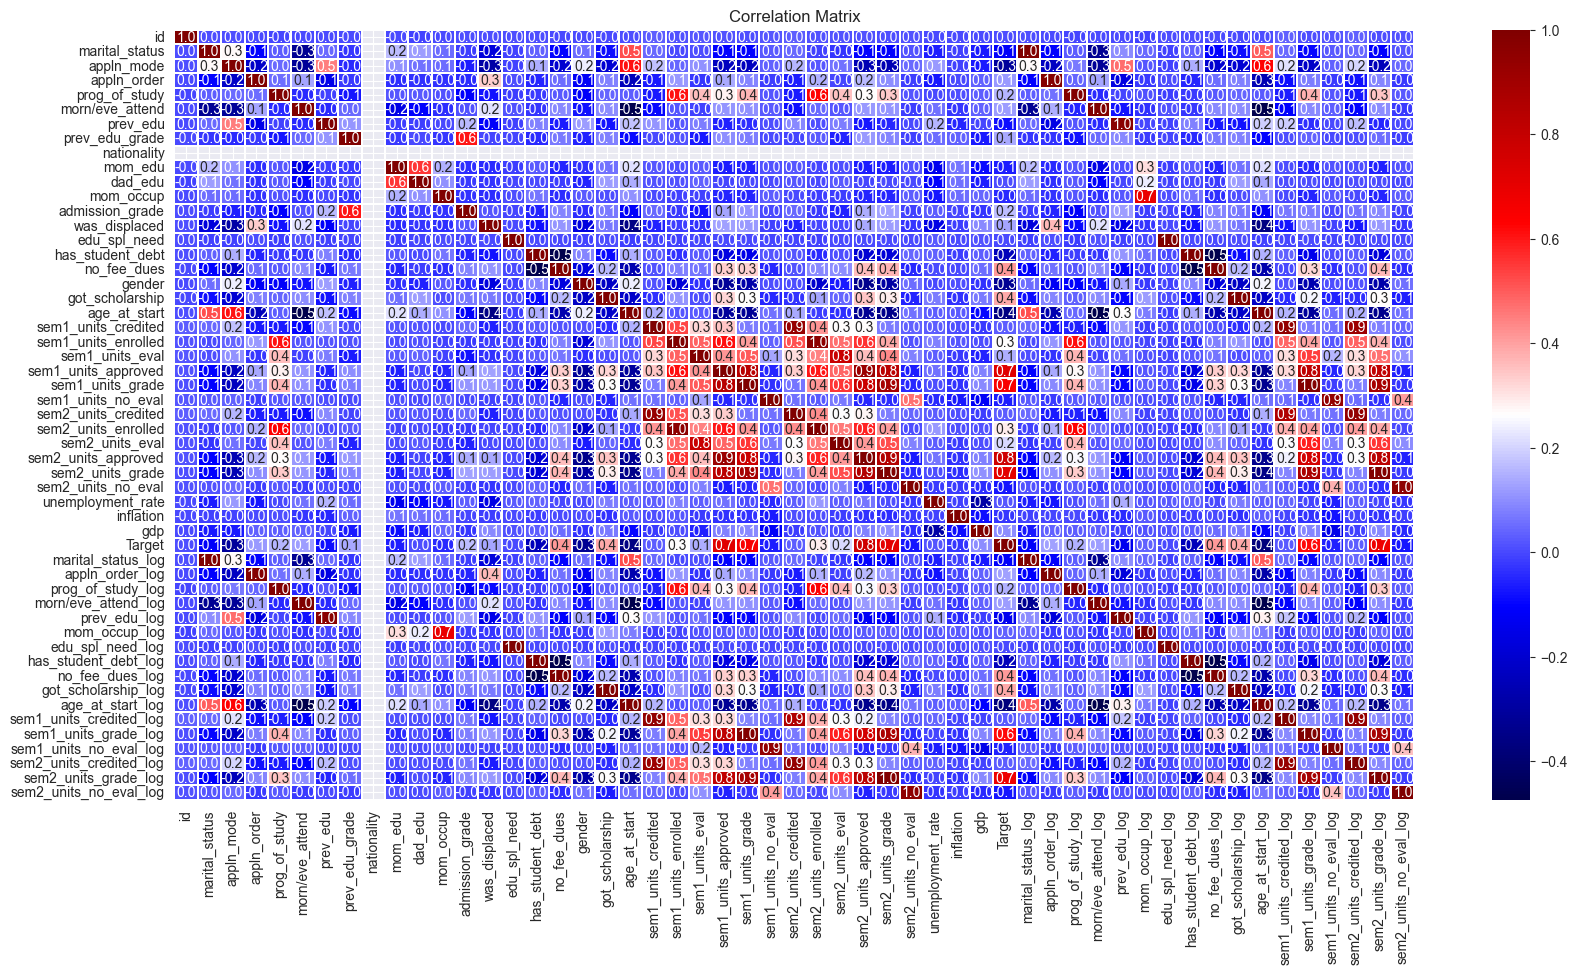

id  marital_status  appln_mode  appln_order  \
id                       1.000000  0.004878        0.005072    0.001807      
marital_status           0.004878  1.000000        0.272726   -0.100441      
appln_mode               0.005072  0.272726        1.000000   -0.215720      
appln_order              0.001807 -0.100441       -0.215720    1.000000      
prog_of_study           -0.006275  0.028514        0.046479    0.055500      
morn/eve_attend          0.000065 -0.328844       -0.318162    0.131721      
prev_edu                 0.002291  0.045752        0.450217   -0.148516      
prev_edu_grade          -0.000080 -0.025391       -0.044105   -0.024774      
nationality             NaN       NaN             NaN         NaN            
mom_edu                 -0.001610  0.165995        0.107279   -0.040792      
dad_edu                 -0.009051  0.123391        0.059511   -0.032501      
mom_occup                0.002573  0.052218        0.055246   -0.030952      
admission_grade          0.005568 -0.015040       -0.062503   -0.044741      
was_displaced            0.004036 -0.179382       -0.284350    0.337746      
edu_spl_need             0.007413 -0.012157       -0.009022    0.008724      
has_student_debt         0.006681  0.035021        0.145906   -0.052671      
no_fee_dues             -0.000936 -0.102607       -0.201443    0.054137      
gender                   0.003595  0.052049        0.239675   -0.118775      
got_scholarship         -0.001171 -0.085755       -0.197475    0.084292      
age_at_start             0.004929  0.519964        0.607723   -0.248829      
sem1_units_credited      0.027804  0.044827        0.172496   -0.070669      
sem1_units_enrolled      0.011433  0.001842        0.043461    0.115004      
sem1_units_eval          0.017277  0.005764        0.105560   -0.028261      
sem1_units_approved      0.013507 -0.102786       -0.234259    0.137705      
sem1_units_grade         0.008876 -0.102296       -0.233680    0.089163      
sem1_units_no_eval       0.016531  0.021795        0.037872   -0.018663      
sem2_units_credited      0.027804  0.045332        0.158907   -0.064166      
sem2_units_enrolled      0.012500 -0.008832        0.015921    0.152466      
sem2_units_eval          0.014699 -0.027909        0.056146   -0.005407      
sem2_units_approved      0.012033 -0.103599       -0.259320    0.159402      
sem2_units_grade         0.008949 -0.106811       -0.255904    0.097216      
sem2_units_no_eval       0.012374  0.014030        0.044730   -0.017308      
unemployment_rate       -0.000908 -0.060874        0.115342   -0.071250      
inflation               -0.000697 -0.008637       -0.010891    0.000357      
gdp                      0.001767 -0.070699       -0.066292    0.033113      
Target                   0.004978 -0.114044       -0.310497    0.117520      
marital_status_log       0.004878  1.000000        0.272726   -0.100441      
appln_order_log          0.002615 -0.107380       -0.231738    0.986659      
prog_of_study_log       -0.006085  0.031674        0.068040    0.039772      
morn/eve_attend_log      0.000065 -0.328844       -0.318162    0.131721      
prev_edu_log             0.001419  0.097806        0.474241   -0.163246      
mom_occup_log           -0.008284  0.048388        0.016525   -0.020737      
edu_spl_need_log         0.007413 -0.012157       -0.009022    0.008724      
has_student_debt_log     0.006681  0.035021        0.145906   -0.052671      
no_fee_dues_log         -0.000936 -0.102607       -0.201443    0.054137      
got_scholarship_log     -0.001171 -0.085755       -0.197475    0.084292      
age_at_start_log         0.005960  0.498625        0.626933   -0.258966      
sem1_units_credited_log  0.033099  0.047841        0.218895   -0.085955      
sem1_units_grade_log     0.008641 -0.098928       -0.218640    0.078334      
sem1_units_no_eval_log   0.020517  0.024487        0.033490   -0.021721      
sem2_units_credited_log  0.033652  0.047534        0.

In [52]:
plot_corr(train1)

### Continuous Numerical Features

Next, we see that there are outliers in the units and grades of sem1 and sem2. Let us see how to handle them - since these are continuous numeric columns we can decide to remove and fill by the average or set the outliers as the upper bound of IQR or lower bound of IQR depending on the outlier magnitude.

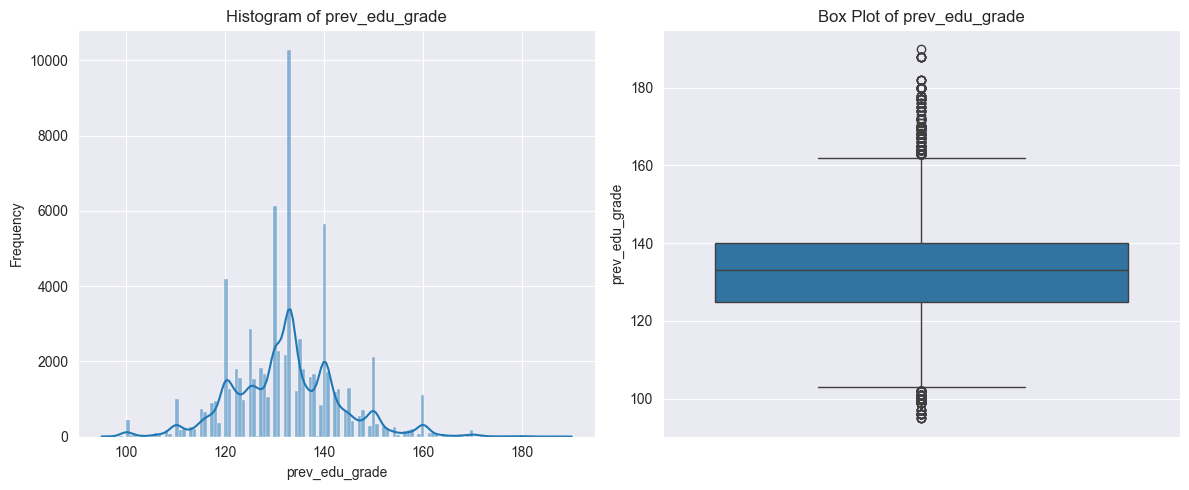

In [53]:
plot_dist('prev_edu_grade',train1)

In [54]:
prev_grade_out = get_outliers(train1['prev_edu_grade'],m=1.5)
prev = train1[(train1['prev_edu_grade']>165) | (train1['prev_edu_grade']<100)]['prev_edu_grade']
prev_grade_out.describe(), prev.describe(), prev.describe()['count']/train1.shape[0]

(count    1134.000000
 mean     136.092504 
 std      34.832874  
 min      95.000000  
 25%      100.000000 
 50%      163.000000 
 75%      170.000000 
 max      190.000000 
 Name: prev_edu_grade, dtype: float64,
 count    461.000000
 mean     165.422993
 std      20.847715 
 min      95.000000 
 25%      168.000000
 50%      170.000000
 75%      172.000000
 max      190.000000
 Name: prev_edu_grade, dtype: float64,
 0.006145191820629716)

(<Axes: >, <Axes: >, <Axes: >)

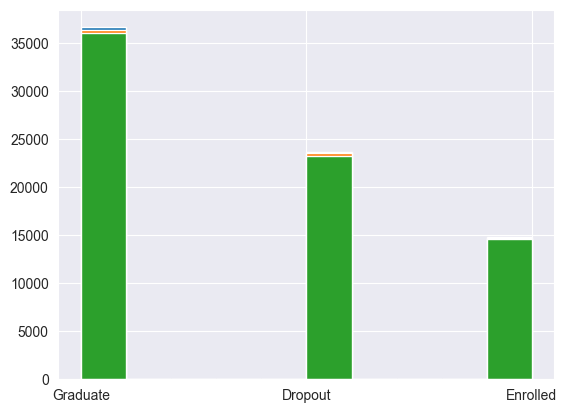

In [55]:
train1['Target'].hist(), train1.drop(index=prev.index)['Target'].hist(), train1.drop(index=prev_grade_out.index)['Target'].hist()

Here, we replace all values above `165` by their mean, and all the values below `100` by their corresponding mean. Next, we check out `admission_grade`.

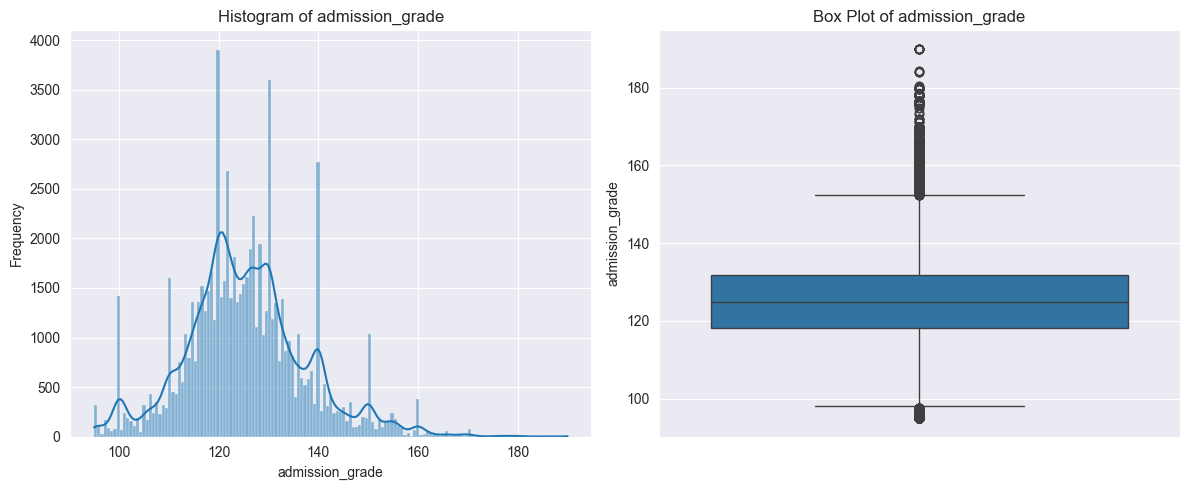

In [56]:
plot_dist('admission_grade',train1)

In [57]:
adm_grad_out = get_outliers(train1['admission_grade'])
adm_grad_out.describe()

count    2636.000000
mean     144.215478 
std      27.548150  
min      95.000000  
25%      152.800000 
50%      155.500000 
75%      160.000000 
max      190.000000 
Name: admission_grade, dtype: float64

In [58]:
adm_grad_out = train1[(train1['admission_grade']<100) | (train1['admission_grade']>165)]['admission_grade']
adm_grad_out.describe()

count    1166.000000
mean     116.399743 
std      33.248978  
min      95.000000  
25%      95.500000  
50%      97.000000  
75%      165.700000 
max      190.000000 
Name: admission_grade, dtype: float64

Here, there are a lot of outliers close to each other. Since, `prev_edu_grade` and `admission_grade` are slightly correlated we use the same bounds as `prev_edu_grade`. Next, let's have a look at the sem1 units - credited, enrolled, eval, approved, grade.

<Axes: >

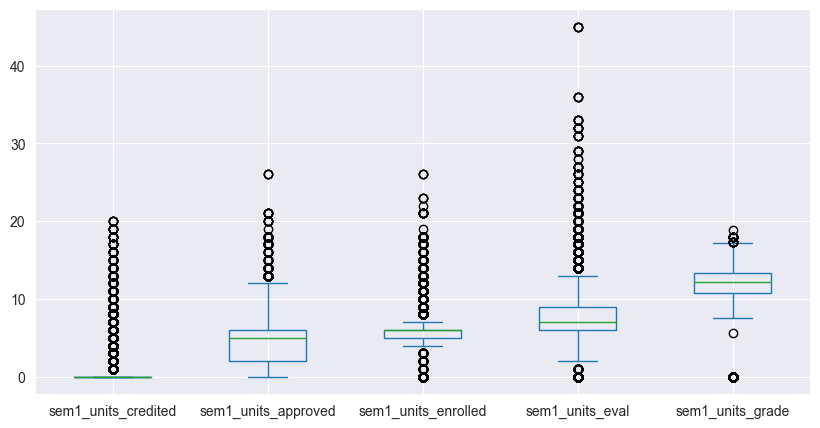

In [59]:
train1[['sem1_units_credited','sem1_units_approved','sem1_units_enrolled','sem1_units_eval','sem1_units_grade']].plot(kind='box',figsize=(10,5))

<Axes: >

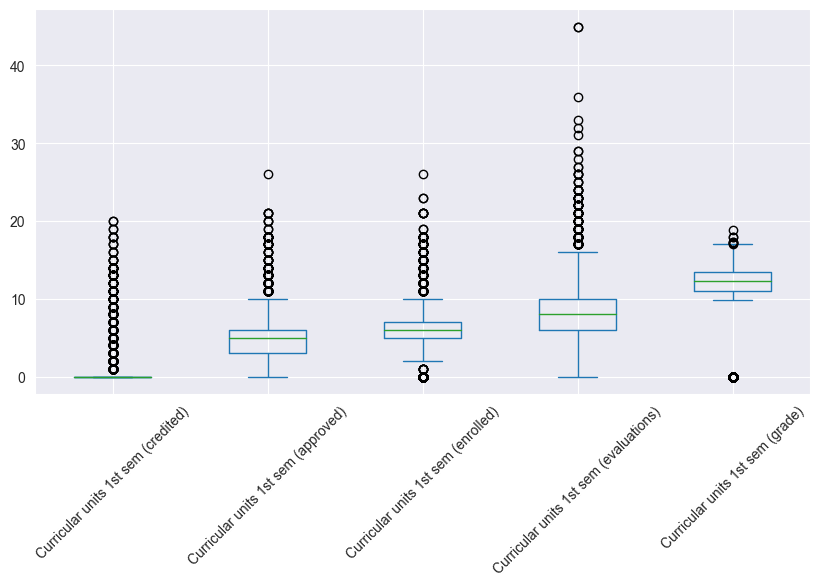

In [60]:
org_df[['Curricular units 1st sem (credited)','Curricular units 1st sem (approved)',
        'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (grade)']].plot(kind='box',figsize=(10,5),rot=45)


<Axes: >

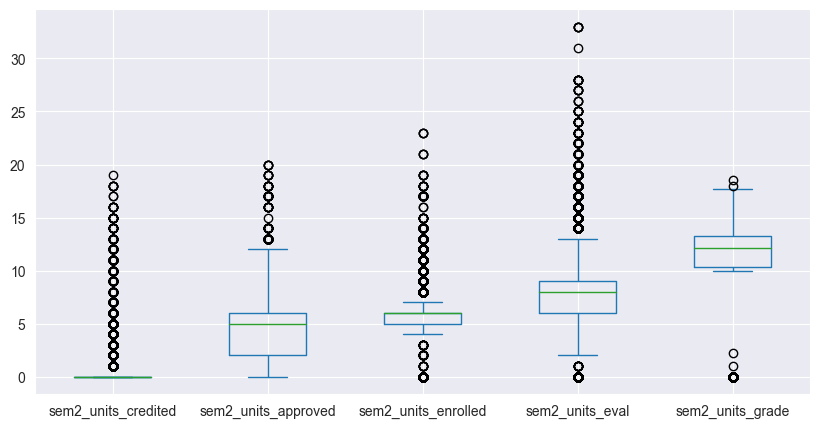

In [61]:
train1[['sem2_units_credited','sem2_units_approved','sem2_units_enrolled','sem2_units_eval','sem2_units_grade']].plot(kind='box',figsize=(10,5))

<Axes: >

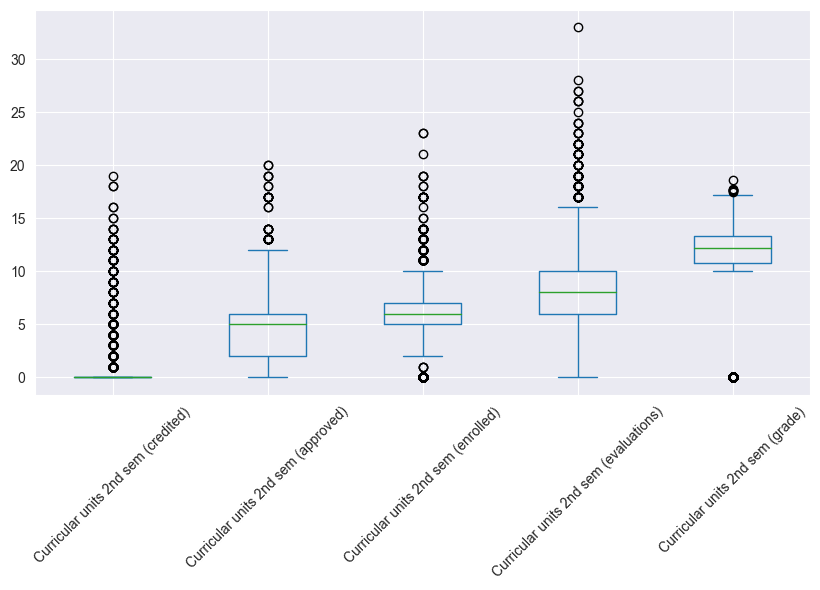

In [62]:
org_df[['Curricular units 2nd sem (credited)','Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)']].plot(kind='box',figsize=(10,5),rot=45)

In [63]:
train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem1_units_grade']==0.0)]['Target'].value_counts(), train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem1_units_enrolled']==0.0)]['Target'].value_counts()

(Target
 Enrolled    653
 Graduate    599
 Name: count, dtype: int64,
 Target
 Graduate    550
 Enrolled    194
 Name: count, dtype: int64)

In [64]:
train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem2_units_grade']==0.0)]['Target'].value_counts(), train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem2_units_enrolled']==0.0)]['Target'].value_counts()

(Target
 Enrolled    685
 Graduate    603
 Name: count, dtype: int64,
 Target
 Graduate    550
 Enrolled    194
 Name: count, dtype: int64)

In [65]:
_df1 = train1[train1['Target'].isin(['Graduate','Enrolled'])]
_df1[(_df1['sem1_units_grade']==0.0) & (_df1['sem2_units_grade']==0.0)]['Target'].value_counts(), _df1[(_df1['sem1_units_enrolled']==0.0) & (_df1['sem2_units_enrolled']==0.0)]['Target'].value_counts()

(Target
 Graduate    586
 Enrolled    502
 Name: count, dtype: int64,
 Target
 Graduate    549
 Enrolled    194
 Name: count, dtype: int64)

We need to fix this problem - it doesn't make sense for Graduates to have `0.0` grade in a semester or for graduates and enrolled to have enrolled in `0.0` credits. So here's how we fix this:\
- For units enrolled, we replace `0.0` with the weighted average of units enrolled by other people
- For grade, we replace `0.0` by the randomly pick scores from the remaining set and assign it one by one to these entries - roulette selection

In [66]:
avg_of_non_zero_enrolled1 = np.mean(train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem1_units_enrolled'] != 0.0)]['sem1_units_enrolled'].values)
avg_of_non_zero_enrolled2 = np.mean(train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem2_units_enrolled'] != 0.0)]['sem2_units_enrolled'].values)

train1[train1['Target'].isin(['Graduate','Enrolled'])]['sem1_units_enrolled'] = train1[train1['Target'].isin(['Graduate','Enrolled'])]['sem1_units_enrolled'].apply(lambda x: x if x != 0.0 else avg_of_non_zero_enrolled1)
train1[train1['Target'].isin(['Graduate','Enrolled'])]['sem2_units_enrolled'] = train1[train1['Target'].isin(['Graduate','Enrolled'])]['sem2_units_enrolled'].apply(lambda x: x if x != 0.0 else avg_of_non_zero_enrolled2)

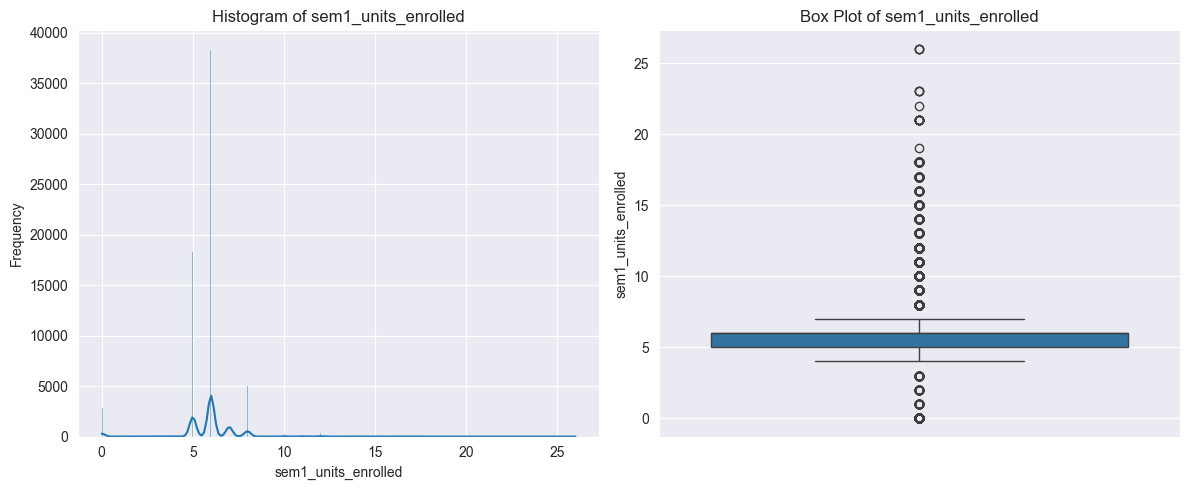

In [67]:
plot_dist('sem1_units_enrolled',train1)

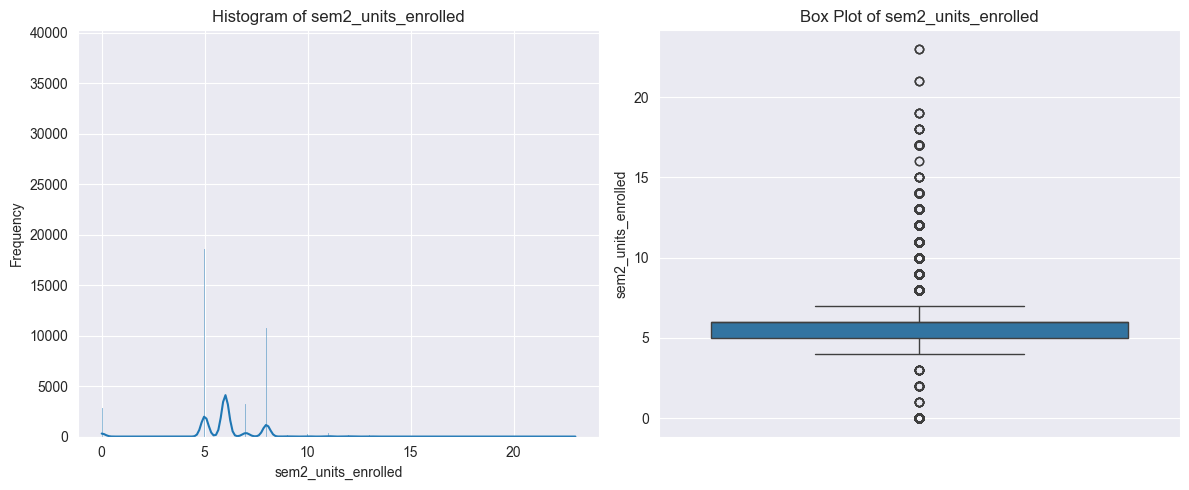

In [68]:
plot_dist('sem2_units_enrolled',train1)

Now, let's look at the `grade` columns

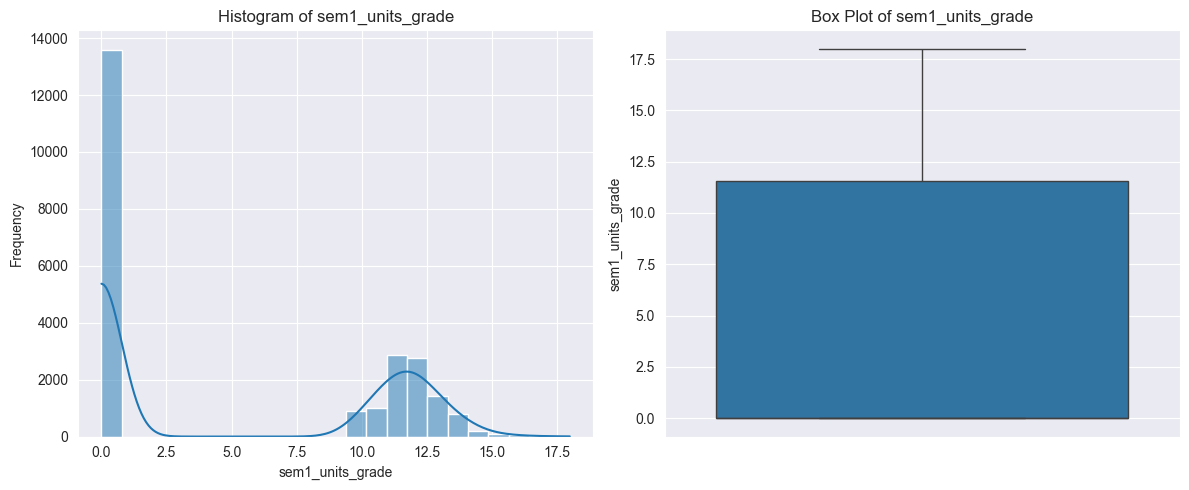

In [69]:
plot_dist('sem1_units_grade',train1[train1['Target']=='Dropout'])

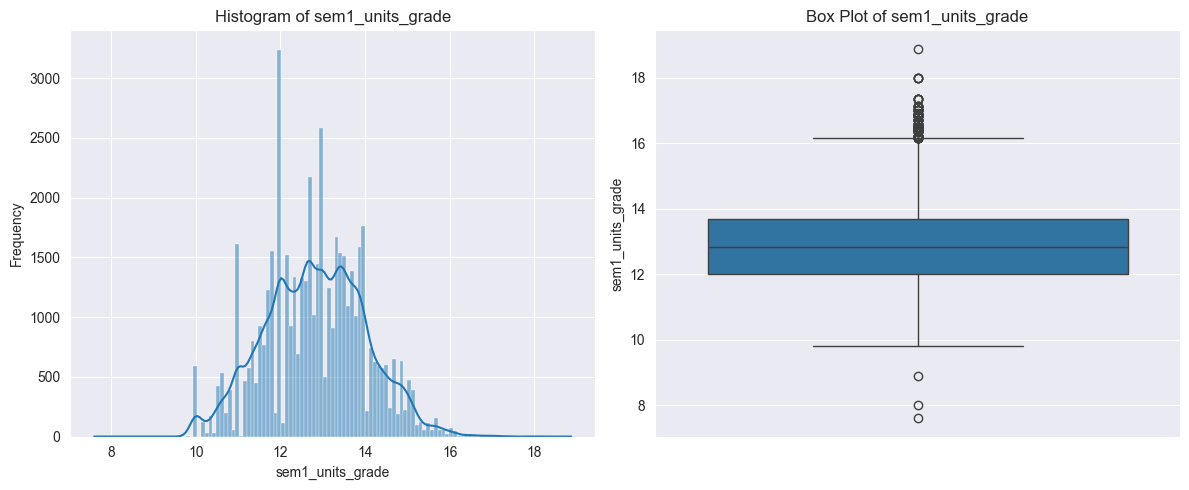

In [70]:
non_zero = train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem1_units_grade'] != 0.0)]
plot_dist('sem1_units_grade',non_zero)

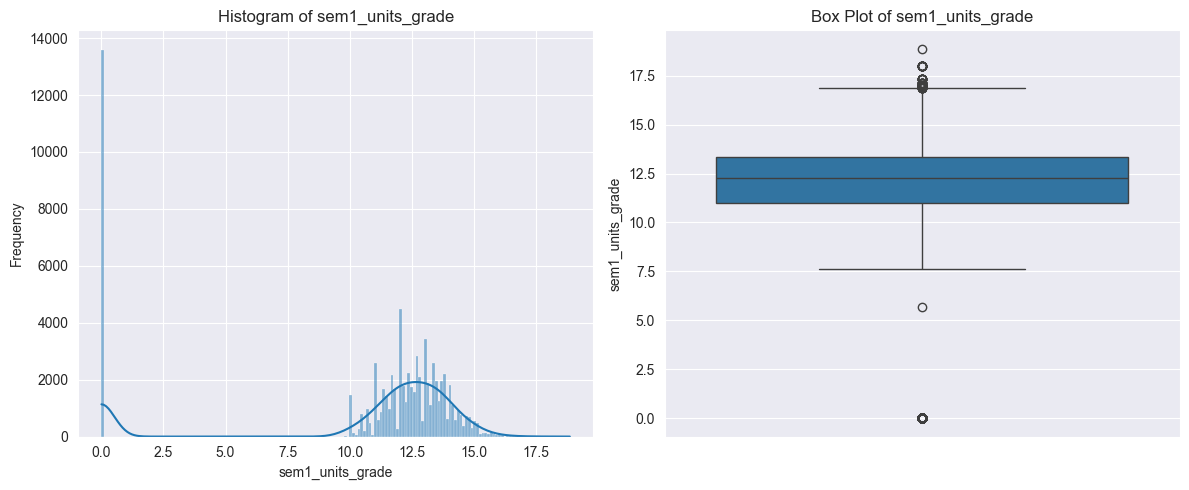

In [71]:
import random

random.seed(42)

for i,row in train1[train1['Target'].isin(['Graduate','Enrolled'])].iterrows():
    if row['sem1_units_grade'] == 0.0:
        train1.at[i,'sem1_units_grade'] = random.choice(non_zero['sem1_units_grade'].unique().tolist())

plot_dist('sem1_units_grade',train1)

`sem2_units_grade` column

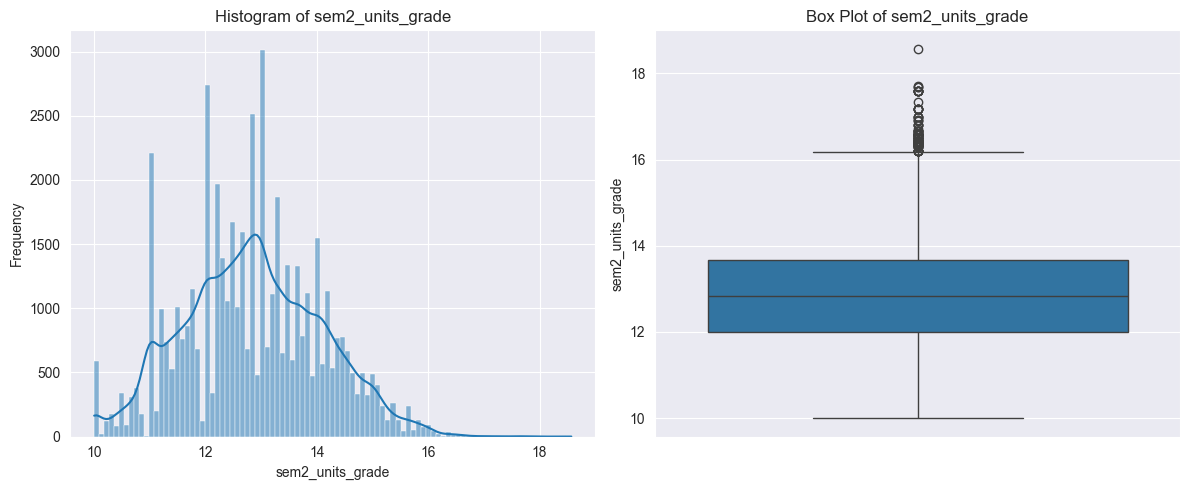

In [72]:
non_zero = train1[(train1['Target'].isin(['Graduate','Enrolled'])) & (train1['sem2_units_grade'] != 0.0)]
plot_dist('sem2_units_grade',non_zero)

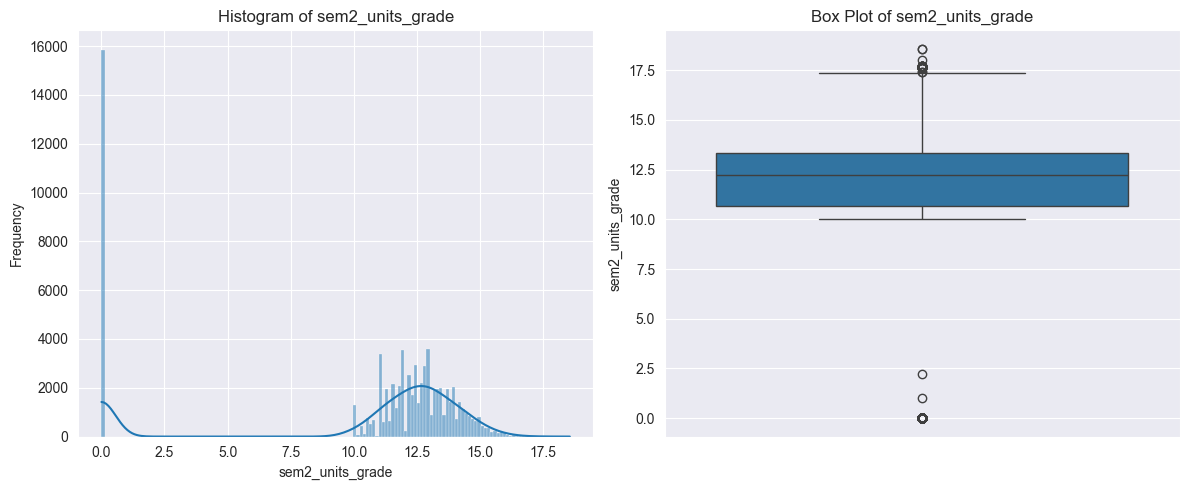

In [73]:
for i,row in train1[train1['Target'].isin(['Graduate','Enrolled'])].iterrows():
    if row['sem2_units_grade'] == 0.0:
        train1.at[i,'sem2_units_grade'] = random.choice(non_zero['sem2_units_grade'].unique().tolist())

plot_dist('sem2_units_grade',train1)

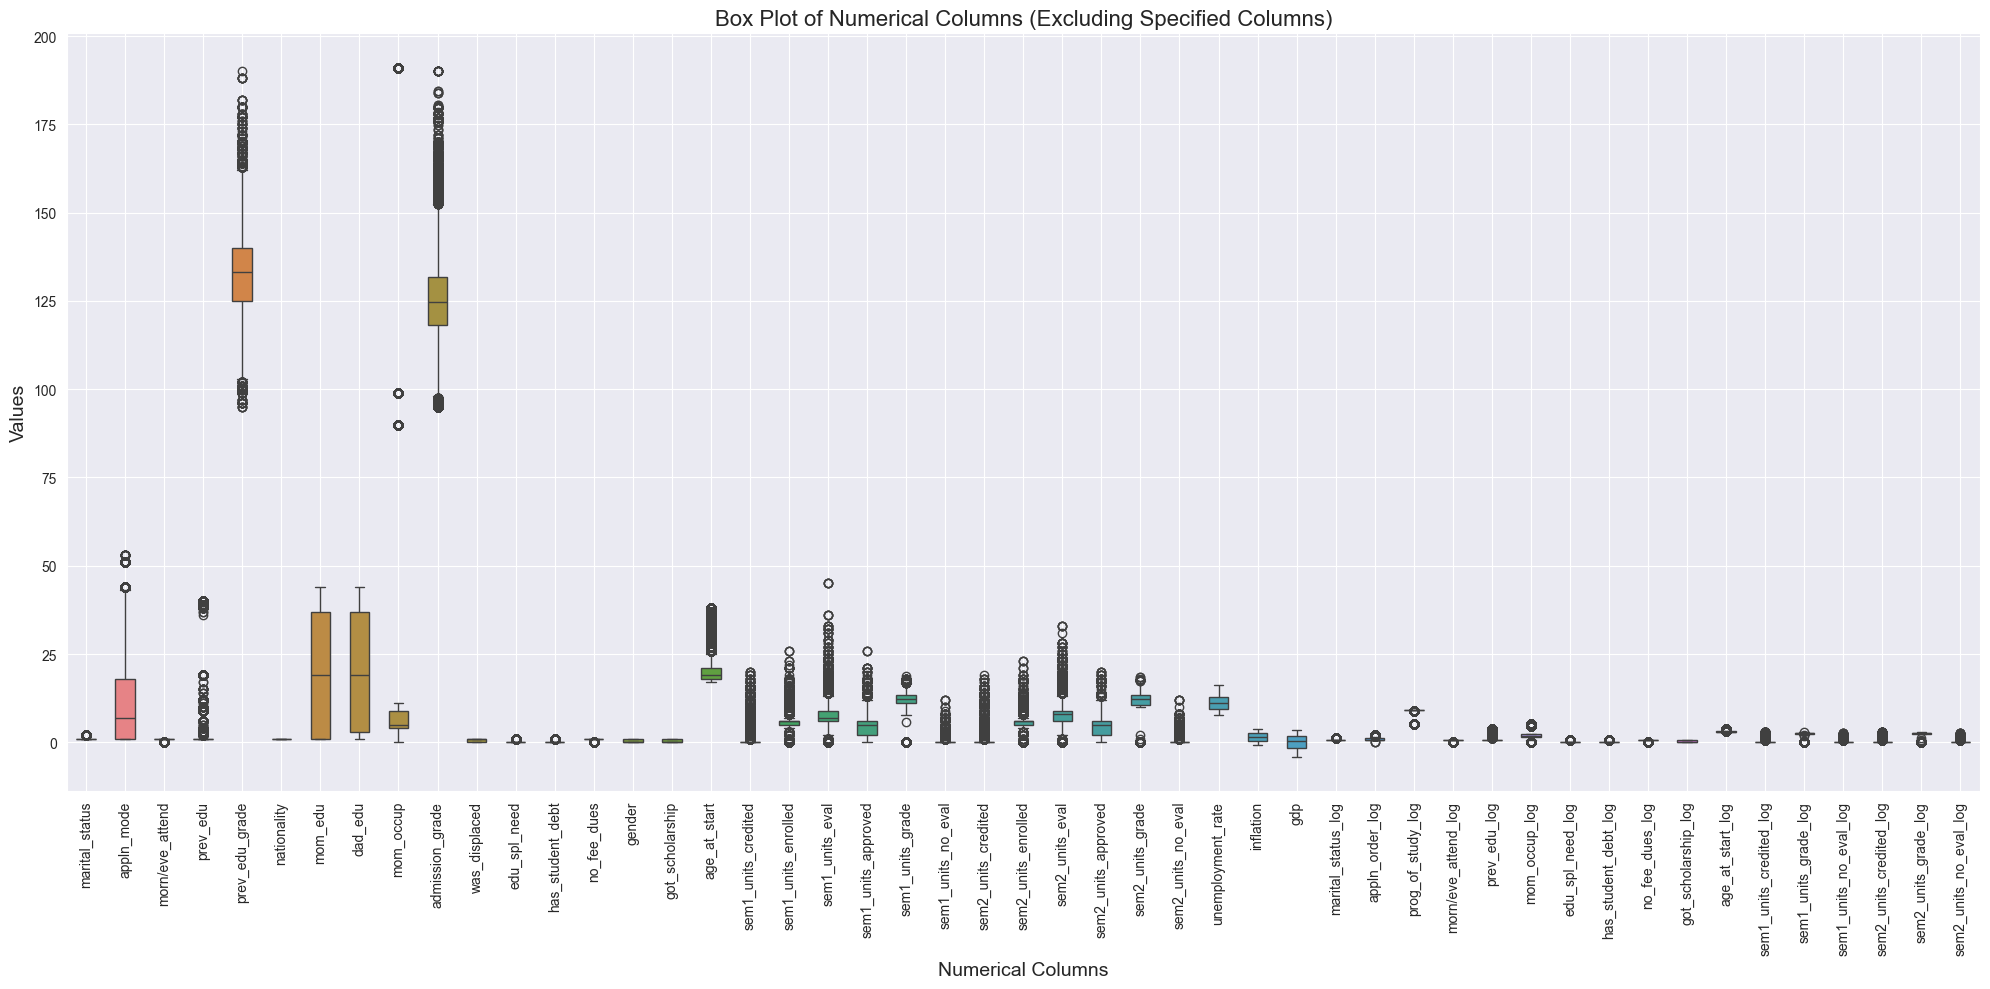

In [74]:
plot_boxes(train1,exclude_columns)

Since, the original data distribution and generated data distribution match, and given that the authors have handled the outliers, we don't modify the sem1 and sem2 data.\
Now, let's summarize the required changes:

| Column | Count of outliers | Outliers dealt | Reason |
| ------ | ----------------- | -------------- | ------ |
| `prev_edu_grade` | 461 | clip them | replace all values above `165` by their mean, and all the values below `100` by their corresponding mean |
| `admission_grade` | 1166 | clip them | replace all values above `165` by their mean, and all the values below `100` by their corresponding mean |
| `sem1_units_enrolled` | 744 | replace them | replace the `0.0` values by the mean of the non-zero values of enrolled units of Graduate and Enrolled students |
| `sem1_units_grade` | 1252 | replace them | replace the `0.0` by roulette selection from the non-zero values of enrolled units of Graduate and Enrolled students |
| `sem2_units_enrolled` | 743 | replace them | replace the `0.0` values by the mean of the non-zero values of enrolled units of Graduate and Enrolled students |
| `sem2_units_grade` | 1288 | replace them | replace the `0.0` by roulette selection from the non-zero values of enrolled units of Graduate and Enrolled students |

Now, after all the changes, we check how the variables are correlated with the others and especially the `Target`

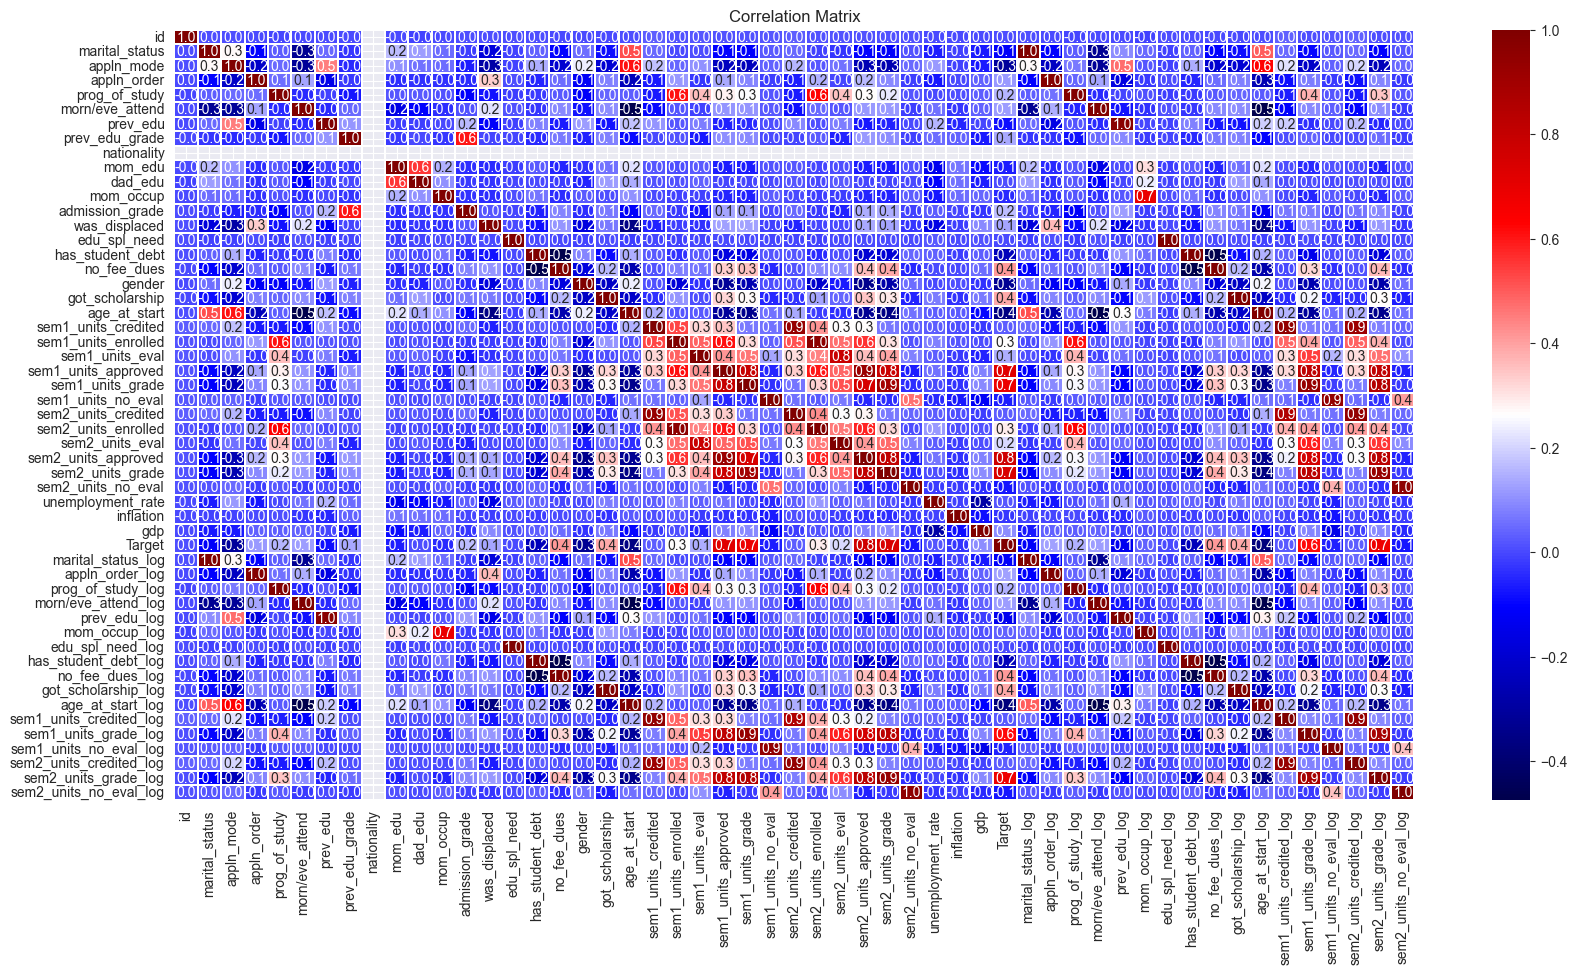

In [75]:
corr = plot_corr(train1)

In the above plot, we see that there are highly correlated columns - this would cause redundancy. So, we remove one of the columns in the pair

In [76]:
corr_columns = list(corr.columns)

corr_columns[-7], corr_columns[2], corr[corr_columns[2]][corr_columns[-7]]

('age_at_start_log', 'appln_mode', 0.6269328812677336)

In [77]:
missing_corr = [corr_columns.index(x) for x in ['nationality','Target']]
dont = []
for i in range(len(corr_columns)):
    for j in range(i+1, len(corr_columns)):
        if (i not in missing_corr) and (j not in missing_corr) and (abs(corr[corr_columns[i]][corr_columns[j]]) > 0.8):
            dont.append((i,j))

set(dont)

{(1, 36),
 (3, 37),
 (4, 38),
 (5, 39),
 (6, 40),
 (14, 42),
 (15, 43),
 (16, 44),
 (18, 45),
 (19, 46),
 (20, 26),
 (20, 47),
 (20, 50),
 (21, 27),
 (23, 29),
 (23, 48),
 (23, 51),
 (24, 30),
 (24, 48),
 (24, 51),
 (25, 49),
 (26, 47),
 (26, 50),
 (29, 30),
 (29, 51),
 (30, 48),
 (30, 51),
 (31, 52),
 (47, 50),
 (48, 51)}

We have collected the columns that could possibly cause redundancy since it is extremely correlated with another column.Let us see their correlation with the `Target`.

In [78]:
corr_check = sorted([(corr['Target'][corr_columns[i[0]]], corr['Target'][corr_columns[i[1]]]) for i in list(set(dont))])
corr_check

[(-0.36341761114985344, -0.3759671194301685),
 (-0.24845220501717857, -0.24845220501718074),
 (-0.11404376964308133, -0.11404376964308006),
 (-0.08798646095667631, -0.13567364838624377),
 (-0.07438442467191159, -0.0711290892839049),
 (-0.0615844948186662, -0.057289509779310736),
 (-0.0018630172541652676, -0.0018630172541652537),
 (0.023347427786414486, 0.029882570435084767),
 (0.028727926949698075, 0.023347427786414486),
 (0.028727926949698075, 0.029882570435084767),
 (0.028727926949698075, 0.031110374791802148),
 (0.031110374791802148, 0.023347427786414486),
 (0.031110374791802148, 0.029882570435084767),
 (0.11751969040651249, 0.12513479272423347),
 (0.1228692663882255, 0.12286926638822519),
 (0.15765673496225044, 0.15076793343520756),
 (0.2655690274254368, 0.2885918705747061),
 (0.38677445461795296, 0.3867744546179515),
 (0.4076866417017208, 0.40768664170171753),
 (0.617065542536803, 0.6799728010444775),
 (0.6872244510487227, 0.617065542536803),
 (0.6872244510487227, 0.67997280104447

We see that for highly correlated columns, their correlation with `Target` is similar. We retain the column which has higher correlation with `Target` among the pairs.

In [79]:
dont = list(set(dont))
print(dont)
for i in range(len(dont)):
    x = dont[i]
    if corr['Target'][corr_columns[x[0]]] >= corr['Target'][corr_columns[x[1]]]:
        dont[i] = x[1]
    else:
        dont[i] = x[0]

dont

[(24, 30), (19, 46), (20, 26), (24, 51), (24, 48), (16, 44), (48, 51), (3, 37), (20, 47), (20, 50), (30, 51), (30, 48), (1, 36), (21, 27), (26, 47), (25, 49), (26, 50), (4, 38), (14, 42), (5, 39), (31, 52), (23, 48), (23, 51), (29, 30), (15, 43), (6, 40), (18, 45), (23, 29), (29, 51), (47, 50)]


[24,
 46,
 20,
 51,
 48,
 44,
 48,
 3,
 47,
 20,
 51,
 48,
 1,
 21,
 47,
 25,
 50,
 38,
 14,
 39,
 31,
 48,
 51,
 30,
 43,
 40,
 45,
 23,
 51,
 47]

Let's exclude the above columns and check the correlation plot

In [81]:
[corr_columns[i] for i in dont]

['sem1_units_grade',
 'age_at_start_log',
 'sem1_units_credited',
 'sem2_units_grade_log',
 'sem1_units_grade_log',
 'no_fee_dues_log',
 'sem1_units_grade_log',
 'appln_order',
 'sem1_units_credited_log',
 'sem1_units_credited',
 'sem2_units_grade_log',
 'sem1_units_grade_log',
 'marital_status',
 'sem1_units_enrolled',
 'sem1_units_credited_log',
 'sem1_units_no_eval',
 'sem2_units_credited_log',
 'prog_of_study_log',
 'edu_spl_need',
 'morn/eve_attend_log',
 'sem2_units_no_eval',
 'sem1_units_grade_log',
 'sem2_units_grade_log',
 'sem2_units_grade',
 'has_student_debt_log',
 'prev_edu_log',
 'got_scholarship_log',
 'sem1_units_approved',
 'sem2_units_grade_log',
 'sem1_units_credited_log']

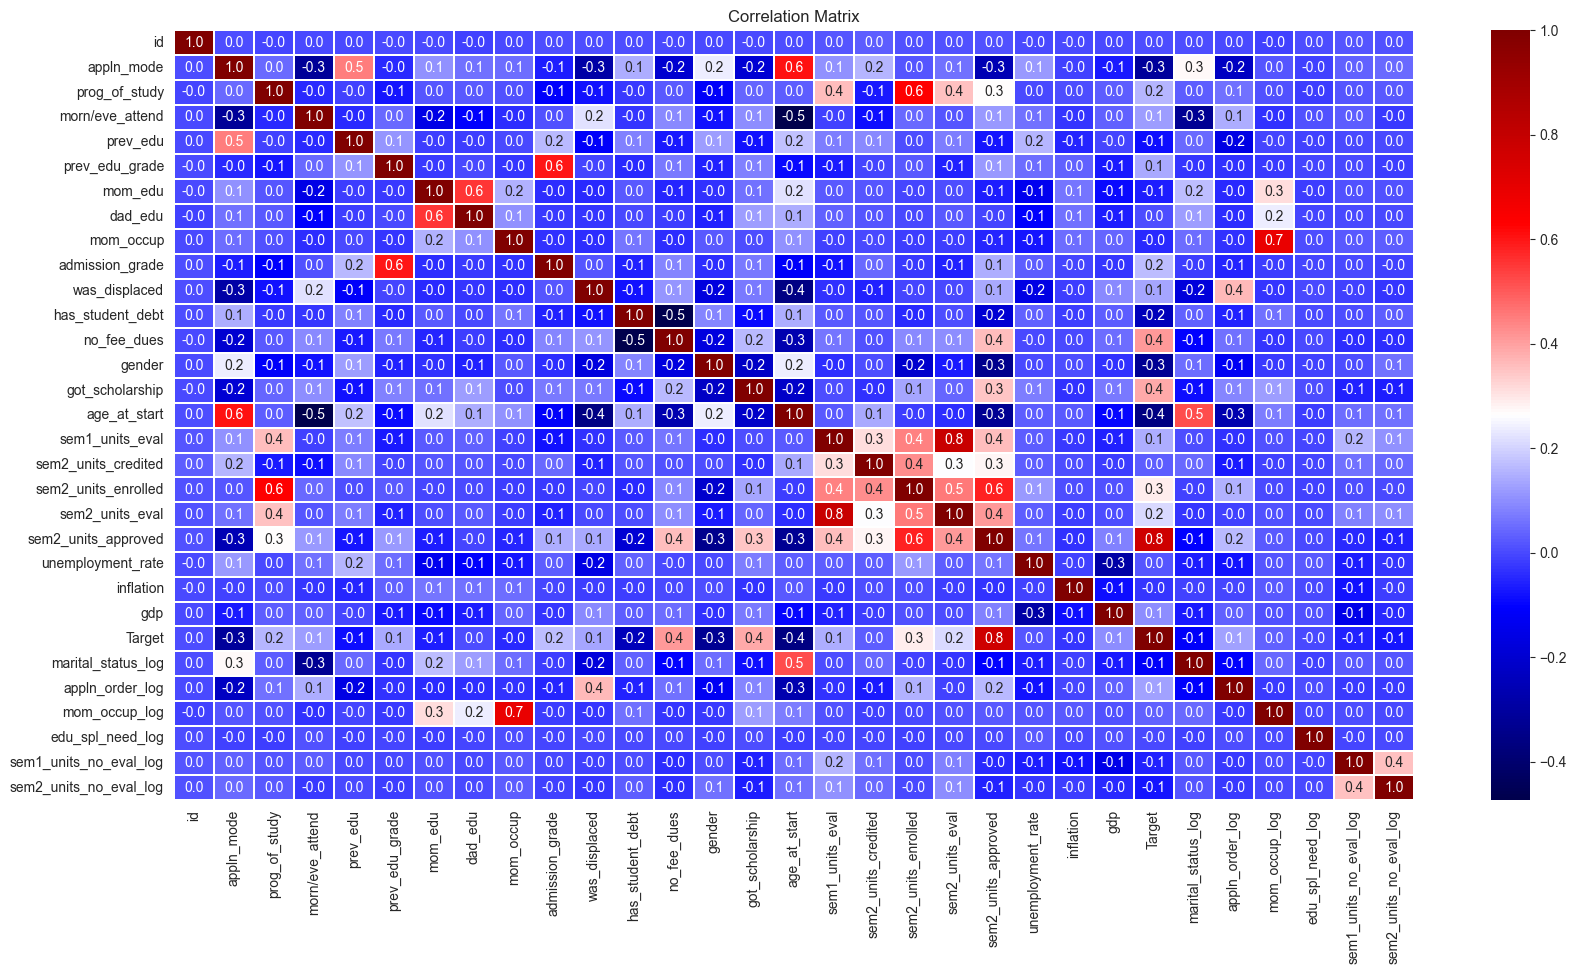

In [82]:
_df = train1.drop(columns=[corr_columns[i] for i in dont]+['nationality'])
corr1= plot_corr(_df)

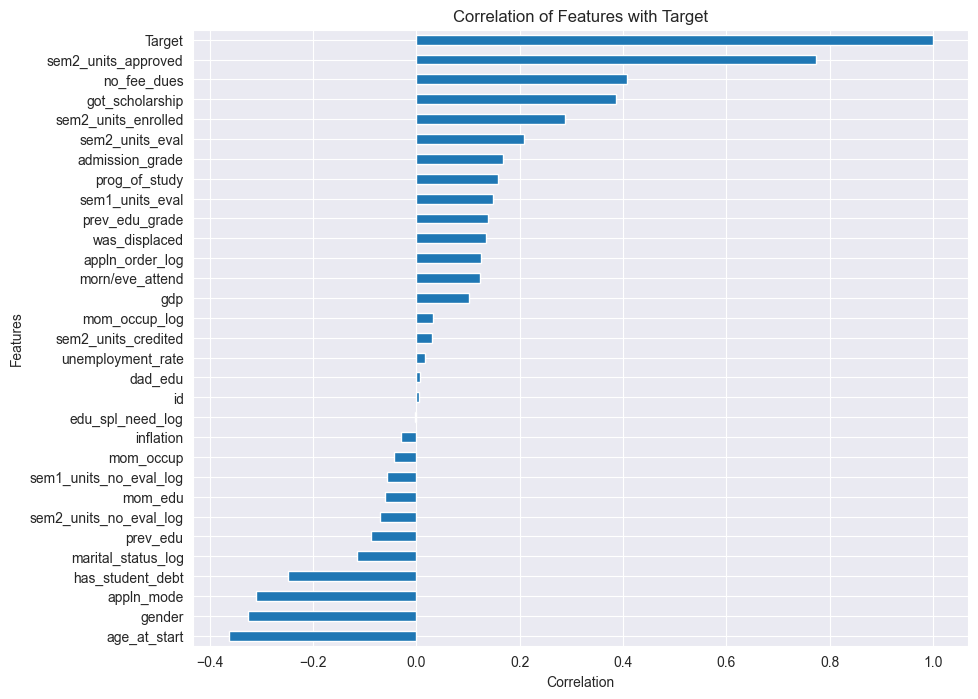

In [83]:
fi_scores = corr1['Target'].sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
fi_scores.plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation of Features with Target')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest skewness at the top
plt.show()

We consider the features whose absolute value of correlation is greater than `0.1`

In [89]:
features = [x for x in list(fi_scores.index) if abs(fi_scores[x]) > 0.1 and x != 'Target']
len(features), features

(18,
 ['sem2_units_approved',
  'no_fee_dues',
  'got_scholarship',
  'sem2_units_enrolled',
  'sem2_units_eval',
  'admission_grade',
  'prog_of_study',
  'sem1_units_eval',
  'prev_edu_grade',
  'was_displaced',
  'appln_order_log',
  'morn/eve_attend',
  'gdp',
  'marital_status_log',
  'has_student_debt',
  'appln_mode',
  'gender',
  'age_at_start'])

## Repeat same steps for `test_df`

In [90]:
train1.to_csv('data/cleaned_train.csv',index=False)
with open('data/features.txt', 'w') as f:
    for line in features:
        f.write(f"{line}\n")
# test_df.to_csv('data/cleaned_test.csv',index=False)